In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ETFunctions as et
import matplotlib.dates as mdates
pd.options.display.max_rows = 20
pd.options.display.max_columns = 999
%matplotlib inline

### Make some helper functions

In [2]:
def MakeLabel(Treat):
    label = ''
    for level in Treat.index:
        label += str(Treat.loc[level]) + ' '
    return label

def MakeYearIndex(Year):
    GraphTreats = GrandIndex.loc[Year,:].dropna(axis=1,how='all')
    try:
        GraphTreats.drop('CommonTreat',axis=1,inplace=True)
    except:
        do = "Nothing"
    for Fact in GraphTreats.columns:
        if len(GraphTreats.loc[:,Fact].drop_duplicates()) <=1:
            GraphTreats.drop(Fact,axis=1,inplace=True)
    return GraphTreats

def SetLineSymbols(Index):
    Colors = ['red','orange','blue','green','black','pink']
    Markers = ['o-','s-','^-','*-','+-','x-']
    Sizes = [12,10,8,6,4,2]
    Demarkers = [Colors, Markers, Sizes]
    DemarkerIndex = []
    FactorNumber = 0
    for Fact in Index.columns:
        LevelList = Index.loc[:,Fact].drop_duplicates().values
        FactorLevels = LevelList.size
        LevelDemarkers = Demarkers[FactorNumber][0:FactorLevels]
        LevelPairs = pd.Series(data=LevelDemarkers, index=LevelList)
        DemarkerIndex.append(LevelPairs)
        FactorNumber +=1
    return DemarkerIndex

def SetSymbols(Index):
    Colors = ['red','orange','blue','green']
    Markers = ['o','s','^','*','+','x']
    Sizes = [12,10,8,6,4,2]
    Demarkers = [Colors, Markers, Sizes]
    DemarkerIndex = []
    FactorNumber = 0
    for Fact in Index.columns:
        LevelList = Index.loc[:,Fact].drop_duplicates().values
        FactorLevels = LevelList.size
        LevelDemarkers = Demarkers[FactorNumber][0:FactorLevels]
        LevelPairs = pd.Series(data=LevelDemarkers, index=LevelList)
        DemarkerIndex.append(LevelPairs)
        FactorNumber +=1
    return DemarkerIndex

def FindAxisMax(DataArray):
    Max = np.percentile(pd.to_numeric(DataArray.dropna()),99)
    Exponent = np.power(10,len(str(int(Max))))
    return np.ceil(Max/Exponent*10)*Exponent/10

def FindAxisMin(DataArray):
    Min = np.percentile(pd.to_numeric(DataArray.dropna()),1)
    Exponent = np.power(10,len(str(int(Min))))
    return np.floor(Min/Exponent*10)*Exponent/10

def MakeSingleVariableRegression(XVar,YVar):
    Graph = plt.figure(figsize=(10,10))
    Yup = FindAxisMax(IndexedData.loc[:,YVar ])
    Ylow = FindAxisMin(IndexedData.loc[:,YVar ])
    Xup = FindAxisMax(IndexedData.loc[:,XVar ])
    Xlow = FindAxisMin(IndexedData.loc[:,XVar ])

    pos=1
    for Year in YearList:
        Ax = Graph.add_subplot(3,2,pos)
        Ax.spines['right'].set_visible(False)
        Ax.spines['top'].set_visible(False)
        plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True)
        plt.tick_params(axis='y', which='both', left=True,right=False, labelbottom=True)
        GraphData = IndexedData.loc[IndexedData.YearSown==Year]
        GraphTreats = GrandIndex.loc[Year,:].dropna(axis=1,how='all')
        GraphTreats.drop('CommonTreat',axis=1,inplace=True)
        for var in GraphTreats.columns:
            LevelList = GraphTreats.loc[:,var].drop_duplicates().values
            if LevelList.size <= 1:
                GraphTreats.drop(var,axis=1,inplace=True)
        Demarkers = SetSymbols(GraphTreats)
        for Treat in GraphTreats.index:
            Filter = GraphData.TrtNum == Treat
            XData = GraphData.loc[Filter,XVar]
            YData = GraphData.loc[Filter,YVar]
            col = Demarkers[0][GraphTreats.loc[Treat][0]]
            mark = Demarkers[1][GraphTreats.loc[Treat][1]]
            plt.plot(XData,YData,mark,color=col,markersize=12)
            plt.plot([Xlow,Xup],[Ylow,Yup],'--',color='k')
            plt.title(Year,fontsize = 20)
        plt.ylim(Ylow,Yup)
        plt.xlim(Xlow,Xup)
        Ax.set_xticks([Ax.get_xticks()[0],Ax.get_xticks()[-1]])
        Ax.set_yticks([Ax.get_yticks()[1],Ax.get_yticks()[-1]])
        if pos in [1,3]:
            plt.ylabel(YVar,fontsize=16)
        if pos in [2,3]:
            plt.xlabel(XVar,fontsize=16)
        pos+=1

def MakeHarvestVariableGraph(Variable):
    Graph = plt.figure(figsize=(10,10))
    pos=1
    TreatInLabel = pd.Series(index = YearList, data = [[1],[1],[0,2],[0,2],[0,2]])
    Yup = FindAxisMax(IndexedData.loc[:,Variable ])
    for Year in YearList:
        Pannel = Graph.add_subplot(len(YearList),1,pos)
        plt.ylim(0,Yup)
        plt.tick_params(labelsize=20)
        Pannel.tick_params(labelbottom=False)
        if Year == 2014:
            plt.ylabel(Variable, fontsize = 20)
        GraphData = pd.to_numeric(IndexedData[GS90Filter].loc[Year,Variable].dropna())
        MeanData = GraphData.groupby(GraphData.index.names).mean()
        Left = 0
        count = 0
        LastSowIndex = MeanData.index[count][0]
        for Treat in MeanData.index:
            SowLab = pd.to_datetime(MeanData.index[count][0]).strftime('%d-%b')
            if count == 0:
                plt.text(Left+1,Yup*0.9,SowLab,fontsize=18)
            if LastSowIndex != MeanData.index[count][0]:
                Left+=1
                plt.text(Left+1,Yup*0.9,SowLab,fontsize=18)
            plt.bar(x=Left+.5,height=MeanData[count],color='lightgrey')
            FullLab = MeanData.index[count][1:]
            forShort = TreatInLabel[Year]
            LabMembers = [FullLab[i] for i in forShort]
            Label = ''
            for member in LabMembers:
                Label += str(member)
                Label += '  '
            height = MeanData[count] * 0.95
            plt.text(Left+.7,height, Label,rotation=90, fontsize=10)
            Left += 1
            LastSowIndex = MeanData.index[count][0]
            count += 1
        pos +=1
        
def MakeTimeCoarseGraph(Year,Variable):
    GraphData = Data.loc[Data.YearSown==Year]
    GraphTreats = GrandIndex.loc[Year,:].dropna(axis=1,how='all')
    for var in GraphTreats.columns:
            LevelList = GraphTreats.loc[:,var].drop_duplicates().values
            if LevelList.size <= 1:
                GraphTreats.drop(var,axis=1,inplace=True)
    Demarkers = SetLineSymbols(GraphTreats)
    Graph = plt.figure(figsize=(8,6))

    for Treat in GraphTreats.index:
        Filter = (Data.YearSown == Year) & (Data.TrtNum == Treat)
        GraphData = Data.loc[Filter,Variable].dropna().groupby(level='SampleDate').mean()
        col = Demarkers[0][GraphTreats.loc[Treat][0]]
        mark = Demarkers[1][GraphTreats.loc[Treat][1]]
        try:
            size = Demarkers[2][GraphTreats.loc[Treat][2]]
        except:
            size = 8
        plt.plot(GraphData,mark,color = col, markersize = size,label = MakeLabel(GraphTreats.loc[Treat,:]))
    plt.xticks(rotation=45)
    plt.ylabel(Variable,fontsize=12)
    plt.tick_params(labelsize=16)
    plt.legend(bbox_to_anchor=(1.45, 1),numpoints=1)
    
def MakeThermalTimeCoarseGraphWithGS(Variable,GSsToGraph,YearsToGraph):
    Colors = ['red','orange','blue','green']
    Markers = ['o-','s-','^-','*-']
    Markers2 = ['o','s','^','*']
    Sizes = [12,10,8,6,4,2]
    Graph = plt.figure(figsize=(12,16))
    YearPos = 0
    for Year in YearsToGraph:
        filter = Data.loc[:,'YearSown'] == Year
        SowDates = pd.to_datetime(Data.loc[filter,'SowingDate'].drop_duplicates().values)
        TreatPos = 0
        Graph.add_subplot(3,1,YearPos+1)
        for Treat in SowDates:
            Filter = (Data.YearSown == Year) & (Data.SowingDate == Treat) & (Data.Cultivar == 'Wakanui')  & (Data.PlantPopn==200)
            GraphData = pd.to_numeric(Data.loc[Filter,Variable].dropna()).groupby(level='SampleDate').mean()
            TtFromSow = pd.to_numeric(Data.loc[Filter,'TtFromSowing'].loc[GraphData.index].dropna()).groupby(level='SampleDate').mean()
            plt.plot(TtFromSow,GraphData,Markers[YearPos],color = Colors[TreatPos], markersize = 8)
            subfilter = (Data.loc[:,'YearSown'] == Year) & (Data.loc[:,'SowingDate']==Treat)
            Date =  Data.loc[subfilter,'GS65'].dropna().drop_duplicates()
            if len(GSsToGraph)>0:
                TtatSow = Data.loc[subfilter,'TTAtSow'].drop_duplicates()
                TTSowTo65 = MetData.loc[Date,'Tt'].values[0]-TtatSow.values[0]
                TTSowTo32 = TTSowTo65 - Post32ZadocModel.loc[Post32ZadocModel.Zstage==65,'TTsinceGS32'].values[0]
                TTSowTo45 = TTSowTo65 - Post32ZadocModel.loc[Post32ZadocModel.Zstage==45,'TTsinceGS32'].values[0]
                plt.plot([TTSowTo32,TTSowTo32],[1.1,0.0],Markers[YearPos],color = Colors[TreatPos], markersize = 8)
            TreatPos +=1
        YearPos+=1
    plt.xticks(rotation=45)
    plt.ylabel(Variable,fontsize=12)
    plt.tick_params(labelsize=16)
    plt.legend(bbox_to_anchor=(1.45, 1),numpoints=1)
    
def MakeThermalTimeCoarseGraph(Variable,YearsToGraph):
    Colors = ['red','orange','blue','green']
    Markers = ['o-','s-','^-','*-']
    Markers2 = ['o','s','^','*']
    Sizes = [12,10,8,6,4,2]
    Graph = plt.figure(figsize=(12,16))
    YearPos = 0
    for Year in YearsToGraph:
        GraphData = Data.loc[Data.YearSown==Year]
        GraphTreats = MakeYearIndex(Year)
        Demarkers = SetLineSymbols(GraphTreats)
        filter = Data.loc[:,'YearSown'] == Year
        SowDates = pd.to_datetime(Data.loc[filter,'SowingDate'].drop_duplicates().values)
        TreatPos = 0
        Graph.add_subplot(3,1,YearPos+1)
        for Treat in SowDates:
            Filter = (Data.YearSown == Year) & (Data.SowingDate == Treat) #& (Data.Cultivar == 'Wakanui')  & (Data.PlantPopn==200)
            GraphData = pd.to_numeric(Data.loc[Filter,Variable].dropna()).groupby(level='SampleDate').mean()
            TtFromSow = pd.to_numeric(Data.loc[Filter,'TtFromSowing'].loc[GraphData.index].dropna()).groupby(level='SampleDate').mean()
            plt.plot(TtFromSow,GraphData,Markers[YearPos],color = Colors[TreatPos], markersize = 8)
            subfilter = (Data.loc[:,'YearSown'] == Year) & (Data.loc[:,'SowingDate']==Treat)
            TreatPos +=1
        YearPos+=1
    plt.xticks(rotation=45)
    plt.ylabel(Variable,fontsize=12)
    plt.tick_params(labelsize=16)
    plt.legend(bbox_to_anchor=(1.45, 1),numpoints=1)

### Bring in the Crop Data

In [3]:
#Data = pd.read_excel('Data compilation updated.xlsx',sheet_name='DataCompiled',skiprows=[0,1,2])
#Data.to_pickle('AllData.pkl')
Data = pd.read_pickle('AllData.zip')

### Set up some index objects

In [4]:
TreatmentList = Data.TrtNum.drop_duplicates().values
print('TreatmentList')
print(TreatmentList)
YearList = Data.YearSown.drop_duplicates().values
print('YearList')
print(YearList)
Factors = ['Cultivar','SowingDate','PlantPopn','PGRCanopyMgmtTrt']

MetaIndex = pd.MultiIndex.from_product([YearList, TreatmentList])
GrandIndex = pd.DataFrame(index = MetaIndex, columns = Factors)
GrandIndex.sort_index(inplace=True)

print('Null Combos')
for Year in YearList:
    for Treat in TreatmentList:
        Filter = (Data.YearSown == Year) & (Data.TrtNum == Treat)
        Indicies = Data.loc[Filter,Data.columns.isin(Factors)].drop_duplicates().values
        try:
            GrandIndex.loc[(Year,Treat)] = Indicies
        except:
            print((str(Year)+' '+str(Treat)))

GrandIndex.dropna(how='all',inplace=True)

#for Treat in GrandIndex.index:
#    GrandIndex.loc[Treat,'SowingDate'] = GrandIndex.loc[Treat,'SowingDate'].to_datetime()

TreatmentList
['2a' '2e' '1a' '1e' '3a' '3e' '2c' '1c' '3c' '1d' '1b' '2f' '2d' '2b'
 '3b' '3d' '4a' '4d' '4b' '4c']
YearList
[2013 2014 2015 2016 2017]
Null Combos
2013 4a
2013 4d
2013 4b
2013 4c
2014 2e
2014 1e
2014 3e
2014 2f
2015 2e
2015 1e
2015 3e
2015 2f
2016 2e
2016 1e
2016 3e
2016 2f
2017 2e
2017 1e
2017 3e
2017 2f
2017 4a
2017 4d
2017 4b
2017 4c


### Make a data frame of zero values on sowing date

In [5]:
ValuesToZero = ['LeafNum',
'NumLeafTips',
'NumLigules',
'PercentSenescence',
'NumGreenLeaves',
'NumSenescingLeaves',
'NumDeadLeaves',
'TotalBiomass',
'TotalLeafBiomass',
'GreenLeafBiomass',
'DeadLeafBiomass',
'LAI',
'CorrLightInterception',
'CorrLAI',
'NDVI',
'NDVIHC',
'WDVI',
'NDVISC']

ZeroData = pd.DataFrame(index = GrandIndex.index, columns = Data.columns)
for treat in ZeroData.index:
    ZeroData.loc[treat,'SampleDate'] = GrandIndex.loc[treat,'SowingDate']
    ZeroData.loc[treat,'Cultivar'] = GrandIndex.loc[treat,'Cultivar']
    ZeroData.loc[treat,'SowingDate'] = GrandIndex.loc[treat,'SowingDate']
    ZeroData.loc[treat,'PlantPopn'] = GrandIndex.loc[treat,'PlantPopn']
    ZeroData.loc[treat,'PGRCanopyMgmtTrt'] = GrandIndex.loc[treat,'PGRCanopyMgmtTrt']
    ZeroData.loc[treat,'YearSown'] = treat[0]
    ZeroData.loc[treat,'TrtNum'] = treat[1]
    for val in ValuesToZero:
        ZeroData.loc[treat,val] = 0.0
for val in ValuesToZero:
    ZeroData.loc[:,val] = pd.to_numeric(ZeroData.loc[:,val])
ZeroData.reset_index(level=[0,1],inplace=True,drop=True)

### Join the zero values with the observations and index the data

In [6]:
Data = pd.concat([Data,ZeroData],sort=False)
#Data = Data.append(ZeroData2013)
Data.set_index('SampleDate',inplace=True,drop=False)
Data.sort_values(by='SowingDate',inplace=True)

In [7]:
for c in Data.columns:
    try:
        Data[c] = pd.to_numeric(Data[c])
    except:
        do = "nothing"


### Add Truncated Sowing date into index and sort

In [8]:
for Treat in GrandIndex.index:
    GrandIndex.loc[Treat,'SowingDate'] = GrandIndex.loc[Treat,'SowingDate'].strftime('%d-%b')

TreatmentOrder = ['SowingDate','Cultivar','PlantPopn','PGRCanopyMgmtTrt']
GrandIndex = GrandIndex[TreatmentOrder]

### Bring in the Met data and calculate a few variables

In [9]:
MetData = pd.read_csv('.\Weather\LincolnClean.met',sep='\t')
MetData.set_index('Date', inplace=True)
MetData.index = pd.to_datetime(MetData.index)
MetData.loc[:,'MeanT'] = np.divide(np.add(MetData.loc[:,'MinT'],MetData.loc[:,'MaxT']),2)
MetData.loc[:,'Tt'] = MetData.loc[:,'MeanT'].cumsum()

In [10]:
for Year in YearList:
    filter = Data.loc[:,'YearSown']==Year
    if Year == 2013:
        FirstNDVI = dt.datetime(2013,5,28)
        LastNDVI = dt.datetime(2013,10,1)
        filter2 = filter & ((Data.SampleDate < FirstNDVI) | (Data.SampleDate > LastNDVI))
        Data.loc[filter2,'I/Io'] = Data.loc[filter2,'CorrLightInterception']
        filter3 = filter & (Data.SampleDate >= FirstNDVI) & (Data.SampleDate <= LastNDVI)
        Data.loc[filter3,'I/Io'] = Data.loc[filter3,'NDVISC']
    else:
        Data.loc[filter,'I/Io'] = Data.loc[filter,'NDVISC']
Data.loc[Data.loc[:,'SampleGS']=='GS90','I/Io'] = 0

## Calculate Thermal time after sowing for each sampling date

In [11]:
for Year in YearList:
    filter = Data.loc[:,'YearSown'] == Year
    SowDates = pd.to_datetime(Data.loc[filter,'SowingDate'].drop_duplicates().values)
    for Sow in SowDates:
        subfilter = (Data.loc[:,'YearSown'] == Year) & (Data.loc[:,'SowingDate']==Sow)
        Data.loc[subfilter,'TTAtSow'] = MetData.loc[Sow,'Tt']        
Data.loc[:,'TtAtSample'] = [MetData.loc[X,'Tt'] for X in Data.index]
Data.loc[:,'TtFromSowing'] = Data.loc[:,'TtAtSample'] - Data.loc[:,'TTAtSow']

### Make a Dataframe for simple biomass model and interpolate Cover values into it

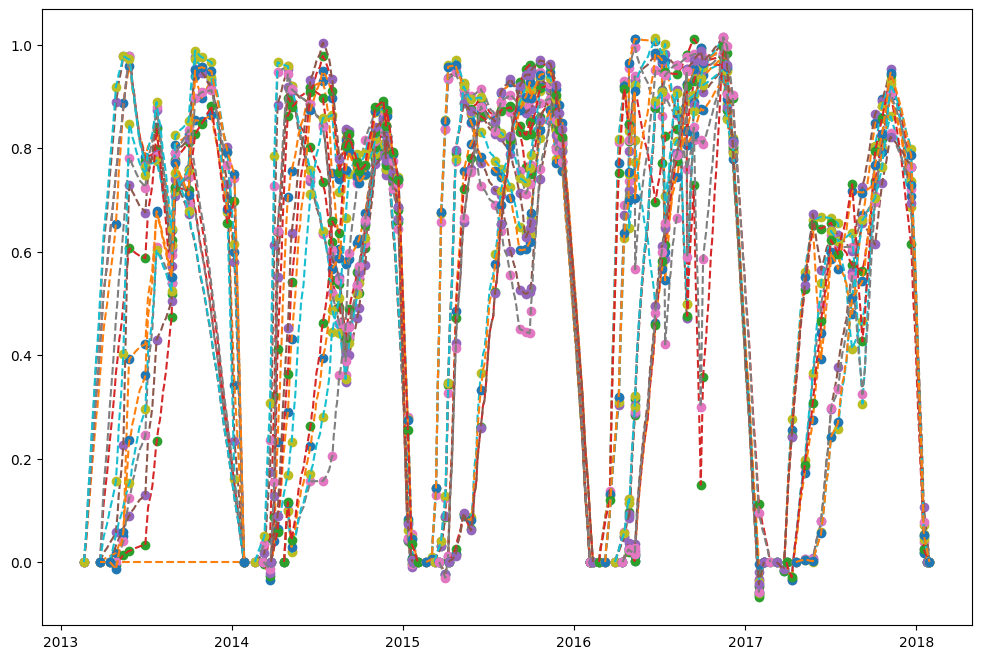

In [12]:
Graph = plt.figure(figsize=(12,8))
VarToInt = 'I/Io'#'NDVISC'
InterpolationIndex = pd.MultiIndex.from_product([YearList,TreatmentList,MetData.loc['2013-02-01':].index], names=['year', 'TrtNum', 'Date'])
BiomassAnalysis = pd.DataFrame(index = InterpolationIndex, columns=[VarToInt])
for Year in [2013,2014,2015,2016,2017]:
    YearData = Data.loc[Data.YearSown==Year,:]
    YearIndex = GrandIndex.loc[Year,:].dropna(axis=1,how='all')
    for Treat in YearIndex.index:
        Filter = YearData.TrtNum == Treat
        TreatCover = YearData.loc[Filter,VarToInt].dropna().groupby(level='SampleDate').mean()
        plt.plot(TreatCover,'o')
        Dates = TreatCover.index
        ArrayTt = MetData.loc[Dates,'Tt']
        InterpDates = MetData.loc[Dates.min():Dates.max()].index
        dailyTt = MetData.loc[InterpDates,'Tt']
        InterpCover = np.interp(dailyTt.values,ArrayTt.values,pd.to_numeric(TreatCover.values))
        TreatIndex = pd.MultiIndex.from_product([[Year],[Treat],InterpDates],names=['Year', 'TrtNum', 'Date'])
        InterpDF = pd.DataFrame(index = TreatIndex, data=InterpCover,columns=[VarToInt])
        plt.plot(InterpDates, InterpDF.loc[:,VarToInt],'--')
        BiomassAnalysis.update(InterpDF)

### Implement simple biomass model

In [13]:
BiomassAnalysis.dropna(inplace=True)
BiomassAnalysis.sort_index(inplace=True)
for Year in [2013,2014,2015,2016,2017]:
    YearData = Data.loc[Data.YearSown==Year,:]
    YearIndex = GrandIndex.loc[Year,:].dropna(axis=1,how='all')
    for Treat in YearIndex.index:
        Rad = MetData.loc[BiomassAnalysis.loc[(Year,Treat),:].index,'Radn']
        Temp = MetData.loc[BiomassAnalysis.loc[(Year,Treat),:].index,'MeanT']
        BiomassAnalysis.loc[(Year,Treat),'Radn'] = Rad.values
        BiomassAnalysis.loc[(Year,Treat),'Temp'] = Temp.values
BiomassAnalysis.loc[:,'IntRadn'] = BiomassAnalysis.loc[:,VarToInt] * BiomassAnalysis.loc[:,'Radn']
XTemp = [-10,0,15,25,35]
YRUE = [0,0,15,15,0]
BiomassAnalysis.loc[:,'RUE'] = [np.interp(BiomassAnalysis.loc[x,'Temp'],XTemp,YRUE) for x in BiomassAnalysis.index]
BiomassAnalysis.loc[:,'PotDM'] = BiomassAnalysis.loc[:,'RUE'] * BiomassAnalysis.loc[:,'IntRadn']

TreatsWithIncompleteRadnData = [(2013,'1b'),(2013,'2b'),(2013,'3b'),
                               (2013,'1d'),(2013,'2d'),(2013,'3d'),
                                (2013,'2f'),
                               (2015,'4d')]
for Incomplete in TreatsWithIncompleteRadnData:
    BiomassAnalysis.loc[Incomplete,:] = np.nan

## Graph Zadoc stage againts TT since sowing for 2014 where we have good data

In [14]:
GrandIndex

SowingDate Cultivar PlantPopn PGRCanopyMgmtTrt
2013 1a     20-Feb  Wakanui        50           Normal
     1b     20-Feb  Wakanui       100           Normal
     1c     20-Feb  Wakanui       150           Normal
     1d     20-Feb  Wakanui       200           Normal
     1e     20-Feb  Wakanui       250           Normal
...            ...      ...       ...              ...
2017 2d     30-Mar  Inferno       150      Defoliation
     3a     19-Apr  Wakanui       150           Normal
     3b     19-Apr  Wakanui       150      Defoliation
     3c     19-Apr  Inferno       150           Normal
     3d     19-Apr  Inferno       150      Defoliation

[76 rows x 4 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


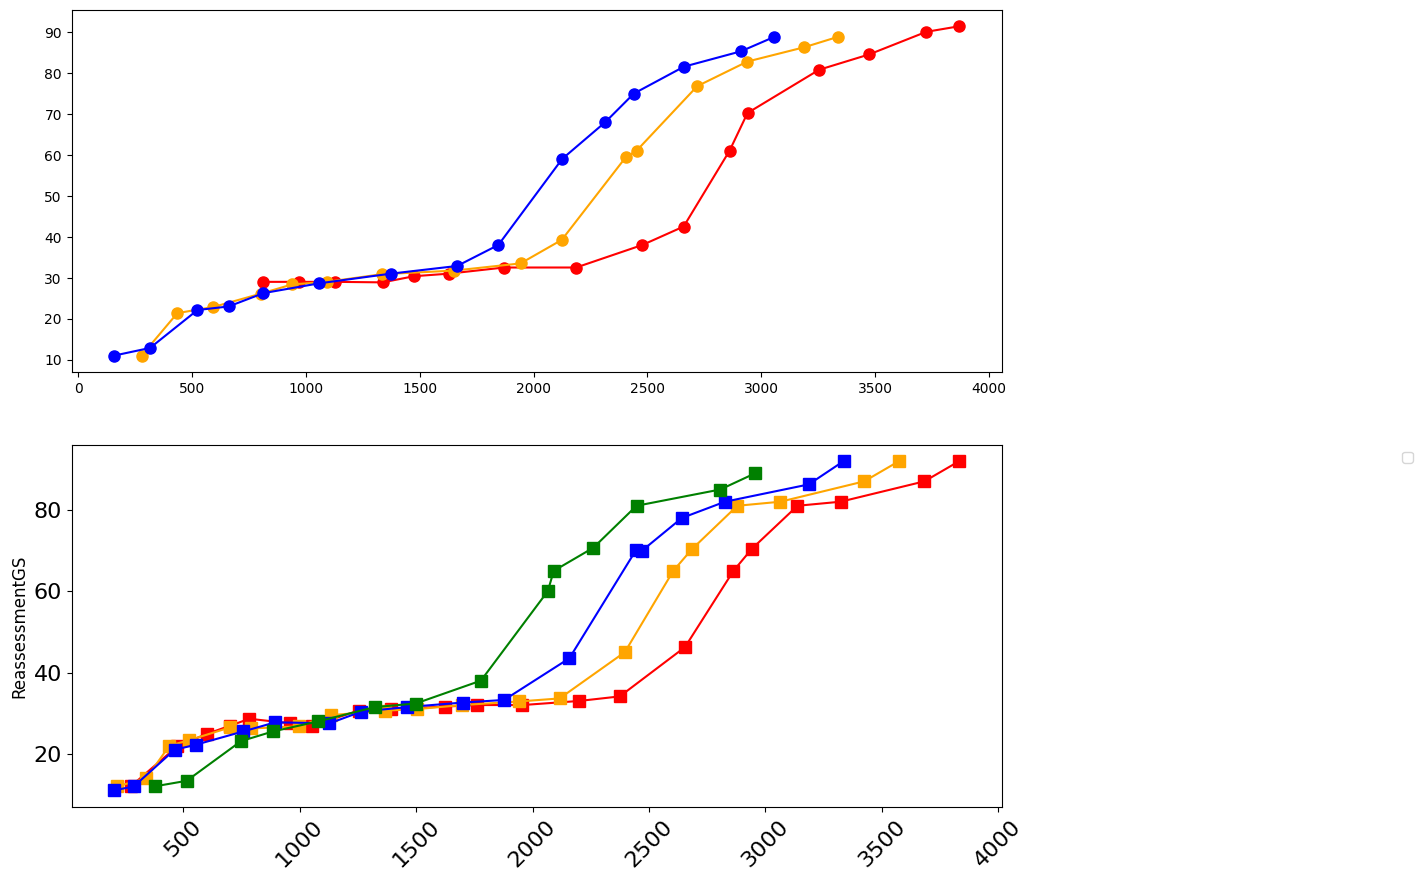

In [15]:
Variable = 'ReassessmentGS'
MakeThermalTimeCoarseGraph(Variable,[2013,2014])
Graph.patch.set_facecolor('white')

## Following GS32 the sowing dates appear to have a similar pattern.  The differences in time to GS32 are related to final leaf number and these can be offset.  Lets look at leaf numbers first for 2014 where zadoc data is best

### First sow date had 17 leaves, then 15.5, 14.5, and 13 leaves for the final sow date.  All of these leaves will be appearing with a large phyllochron and this many phyllochrons can be removed to align the zadoc data post stage 32 for model fitting.

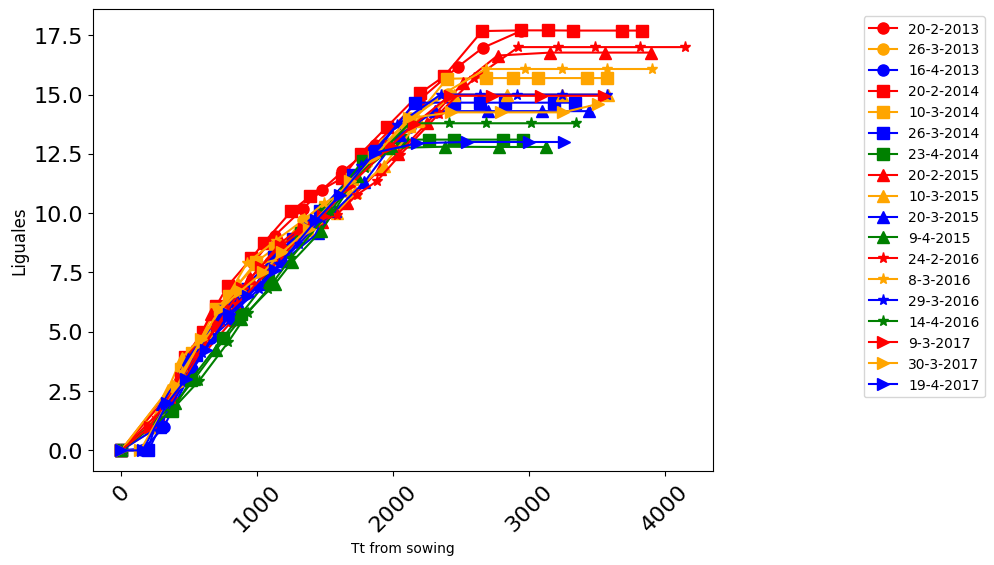

In [16]:
Colors = ['red','orange','blue','green']
Markers = ['o-','s-','^-','*-','>-']
Sizes = [12,10,8,6,4,2]
Graph = plt.figure(figsize=(8,6))
YearPos = 0
for Year in YearList:
    Filter = Data.loc[:,'YearSown'] == Year
    SowDates = pd.to_datetime(Data.loc[Filter,'SowingDate'].drop_duplicates().values)
    TreatPos = 0
    for Treat in SowDates:
        Filter = (Data.YearSown == Year) & (Data.SowingDate == Treat) & (Data.Cultivar == 'Wakanui')  & ((Data.PlantPopn==200) | (Data.PlantPopn==50) |(Data.PlantPopn==150)) & (Data.PGRCanopyMgmtTrt == 'Normal')
        GraphData = pd.to_numeric(Data.loc[Filter,'NumLigules'].dropna()).groupby(level='SampleDate').mean()
        TtFromSow = pd.to_numeric(Data.loc[Filter,'TtFromSowing'].loc[GraphData.index].dropna()).groupby(level='SampleDate').mean()
        plt.plot(TtFromSow,GraphData,Markers[YearPos],color = Colors[TreatPos], markersize = 8,label = str(Treat.day)+'-'+str(Treat.month)+'-'+str(Treat.year))
        TreatPos +=1
    YearPos+=1
plt.xticks(rotation=45)
plt.ylabel('Liguales',fontsize=12)
plt.xlabel('Tt from sowing')
plt.tick_params(labelsize=16)
plt.legend(bbox_to_anchor=(1.45, 1),numpoints=1)
Graph.patch.set_facecolor('white')

### Export ligule data for Pierre

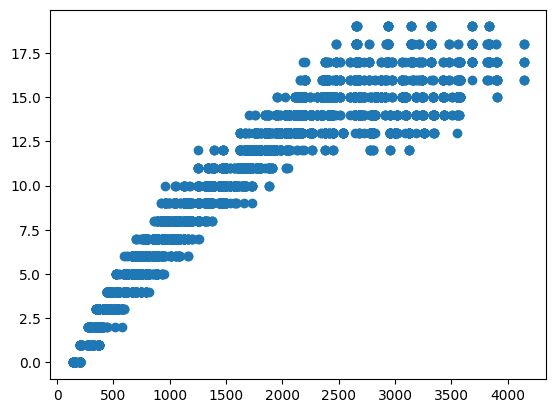

In [17]:
include = ['SowingDate','TtFromSowing','NumLigules','PlantPopn','Block']
Filter = (Data.Cultivar == 'Wakanui')  & ((Data.PlantPopn==200) | (Data.PlantPopn==50) |(Data.PlantPopn==150)) & (Data.PGRCanopyMgmtTrt == 'Normal')
LeafData = Data.loc[Filter,include].dropna()
plt.plot(LeafData.TtFromSowing,LeafData.NumLigules,'o')
LeafData.loc[:,'Year'] = [LeafData.SowingDate[x].year for x in range(LeafData.index.size)]
LeafData.to_excel('2020LiguleData.xlsx',sheet_name = 'Ligules',merge_cells=False)
MetData.to_excel('2020MetData.xlsx',sheet_name = 'MetData',merge_cells=False,)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


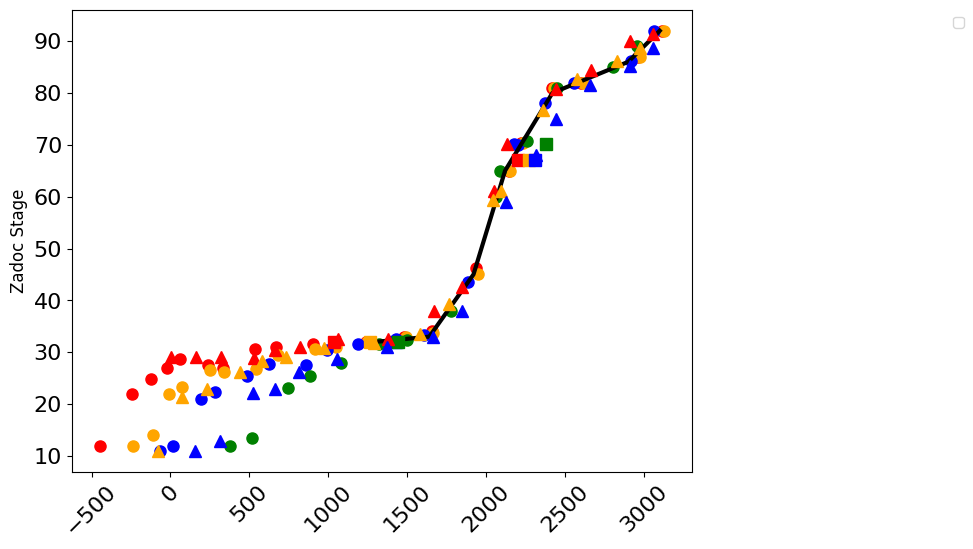

In [18]:
Colors = ['red','orange','blue','green']
phyllochron = 180
ExtraLeaves = [4,2.5,1.5,0]
Offsets = np.multiply(ExtraLeaves,phyllochron)
Graph = plt.figure(figsize=(8,6))
YearPos = 0
filter = Data.loc[:,'YearSown'] == 2014
SowDates = pd.to_datetime(Data.loc[filter,'SowingDate'].drop_duplicates().values)
TreatPos = 0
for Treat in SowDates:
    Filter = (Data.YearSown == 2014) & (Data.SowingDate == Treat) 
    GraphData = pd.to_numeric(Data.loc[Filter,'ReassessmentGS'].dropna()).groupby(level='SampleDate').mean()
    TtFromSow = pd.to_numeric(Data.loc[Filter,'TtFromSowing'].loc[GraphData.index].dropna()).groupby(level='SampleDate').mean() 
    TtFrom32 = np.subtract(TtFromSow, Offsets[TreatPos])
    plt.plot(TtFrom32,GraphData,'o',color = Colors[TreatPos], markersize = 8)
    TreatPos +=1
YearPos+=1
plt.xticks(rotation=45)
plt.ylabel('Zadoc Stage',fontsize=12)
plt.tick_params(labelsize=16)
plt.legend(bbox_to_anchor=(1.45, 1),numpoints=1)

#Model to quantify development post GS32
OffsetTtSowing = [1300, 1640, 1920, 2120, 2420, 2900, 3100]
Zstage = [32, 33, 45, 65, 80, 86, 92]

plt.plot(OffsetTtSowing,Zstage,'-',color='k',lw=3)

ExtraLeaves = [4,2.5,1.5,0]
Offsets = np.multiply(ExtraLeaves,phyllochron)
YearPos = 0
filter = Data.loc[:,'YearSown'] == 2015
SowDates = pd.to_datetime(Data.loc[filter,'SowingDate'].drop_duplicates().values)
TreatPos = 0
for Treat in SowDates:
    Filter = (Data.YearSown == 2015) & (Data.SowingDate == Treat) 
    GraphData = pd.to_numeric(Data.loc[Filter,'ReassessmentGS'].dropna()).groupby(level='SampleDate').mean()
    TtFromSow = pd.to_numeric(Data.loc[Filter,'TtFromSowing'].loc[GraphData.index].dropna()).groupby(level='SampleDate').mean() 
    TtFrom32 = np.subtract(TtFromSow, Offsets[TreatPos])
    plt.plot(TtFrom32,GraphData,'s',color = Colors[TreatPos], markersize = 8)
    TreatPos +=1
YearPos+=1
plt.xticks(rotation=45)
plt.tick_params(labelsize=16)
plt.legend(bbox_to_anchor=(1.45, 1),numpoints=1)

ExtraLeaves = [4.5,2,0]
Offsets = np.multiply(ExtraLeaves,phyllochron)
YearPos = 0
filter = Data.loc[:,'YearSown'] == 2013
SowDates = pd.to_datetime(Data.loc[filter,'SowingDate'].drop_duplicates().values)
TreatPos = 0
for Treat in SowDates:
    Filter = (Data.YearSown == 2013) & (Data.SowingDate == Treat) 
    GraphData = pd.to_numeric(Data.loc[Filter,'ReassessmentGS'].dropna()).groupby(level='SampleDate').mean()
    TtFromSow = pd.to_numeric(Data.loc[Filter,'TtFromSowing'].loc[GraphData.index].dropna()).groupby(level='SampleDate').mean() 
    TtFrom32 = np.subtract(TtFromSow, Offsets[TreatPos])
    plt.plot(TtFrom32,GraphData,'^',color = Colors[TreatPos], markersize = 8)
    TreatPos +=1
YearPos+=1
plt.xticks(rotation=45)
plt.tick_params(labelsize=16)
plt.legend(bbox_to_anchor=(1.45, 1),numpoints=1)
Graph.patch.set_facecolor('white')

### Now we have a model to interpolate zadox stage from a given date, package it into a data frame

In [19]:
Post32ZadocModel = pd.DataFrame(columns = ['TTsinceGS32','Zstage'])
Post32ZadocModel.TTsinceGS32 = np.subtract(OffsetTtSowing,OffsetTtSowing[0])
Post32ZadocModel.Zstage = Zstage

# Make a dataframe with indexing needed for doing harvest summary and determine crop specific variables

In [20]:
Index = ['YearSown','SowingDate','Cultivar','PlantPopn','PGRCanopyMgmtTrt','Block']
IndexedData = Data.set_index(Index,drop=False)
IndexedData.sort_index(inplace=True)
#Make filters for selecting specific sample timings
GS32Filter = (IndexedData.loc[:,'SampleGS']=='GS32').values
GS65Filter = (IndexedData.loc[:,'SampleGS']=='GS65').values
GS90Filter = (IndexedData.loc[:,'SampleGS']=='GS90').values
#Calculate Anthesis parameters
IndexedData.loc[GS90Filter,'AnthesisStem'] = IndexedData.loc[GS65Filter,'StemBiomass']
IndexedData.loc[GS90Filter, 'VegetativeBiomass'] = IndexedData.loc[GS32Filter,'TotalBiomass']                                     
IndexedData.loc[GS90Filter, 'AnthesisBiomass'] = IndexedData.loc[GS65Filter,'TotalBiomass']                                     
IndexedData.loc[GS90Filter,'GrainsPerGramStem'] = IndexedData.loc[GS90Filter,'GrainsMSq']/(IndexedData.loc[GS65Filter,'StemBiomass']/10)
IndexedData.loc[GS90Filter,'1000GrainWt0Pc'] = IndexedData.loc[GS90Filter,'ThousandGrainWeight'] * (100-IndexedData.loc[GS90Filter,'GrainMoisture'])/100
IndexedData.loc[GS90Filter, 'GS32to65Biomass'] = IndexedData.loc[GS90Filter, 'AnthesisBiomass'] - IndexedData.loc[GS90Filter, 'VegetativeBiomass']
IndexedData.index = IndexedData.index.droplevel(5)

## Determine exact dates for GS32, 65 and 90 from the Zadoc Tt model defined above

In [21]:
TTat65 = np.interp(65,Post32ZadocModel.Zstage,Post32ZadocModel.TTsinceGS32)
TTat90 = np.interp(90,Post32ZadocModel.Zstage,Post32ZadocModel.TTsinceGS32)
TT65to90 = TTat90 - TTat65
for plot in IndexedData.loc[GS65Filter].index:
    GSAtSample = IndexedData.loc[GS65Filter].loc[plot].ReassessmentGS.mean()
    TTatObsDate = np.interp(GSAtSample,Post32ZadocModel.Zstage,Post32ZadocModel.TTsinceGS32)
    TTAdjust = TTat65 - TTatObsDate
    TTSowTo65 = TTAdjust + IndexedData.loc[GS65Filter].loc[plot].TtFromSowing.mean()
    TTSowTo90 = TTSowTo65 + TT65to90
    TTSowTo32 = TTSowTo65 - TTat65
    AccumTTatSow = IndexedData.loc[GS65Filter].loc[plot].TTAtSow.mean()
    AccumTTat32 = AccumTTatSow + TTSowTo32
    AccumTTat65 = AccumTTatSow + TTSowTo65
    AccumTTat90 = AccumTTatSow + TTSowTo90
    Filter = MetData.Tt == min(MetData.Tt, key=lambda x:abs(x-AccumTTat32))
    IndexedData.loc[plot,'GS32'] = MetData.loc[Filter].index[0]
    IndexedData.loc[plot,'GS32DAS'] = (IndexedData.loc[plot,'GS32'].values[0] - IndexedData.loc[plot,'GS32'].index.get_level_values(1)[0]).days
    Filter = MetData.Tt == min(MetData.Tt, key=lambda x:abs(x-AccumTTat65))
    IndexedData.loc[plot,'GS65'] = MetData.loc[Filter].index[0]
    IndexedData.loc[plot,'GS65DAS'] = (IndexedData.loc[plot,'GS65'].values[0] - IndexedData.loc[plot,'GS65'].index.get_level_values(1)[0]).days
    Filter = MetData.Tt == min(MetData.Tt, key=lambda x:abs(x-AccumTTat90))
    IndexedData.loc[plot,'GS90'] = MetData.loc[Filter].index[0]
    IndexedData.loc[plot,'GS90DAS'] = (IndexedData.loc[plot,'GS90'].values[0] - IndexedData.loc[plot,'GS90'].index.get_level_values(1)[0]).days
IndexedData.loc[:,'GS32DAS'] = pd.to_numeric(IndexedData.loc[:,'GS32DAS'])
IndexedData.loc[:,'GS65DAS'] = pd.to_numeric(IndexedData.loc[:,'GS65DAS'])
IndexedData.loc[:,'GS90DAS'] = pd.to_numeric(IndexedData.loc[:,'GS90DAS'])

### Calculate stage specific met variables

In [31]:
# IndexedData.loc[:,'VegRadn'] = np.nan
# IndexedData.loc[:,'VegTemp'] = np.nan
# IndexedData.loc[:,'VegPTQ'] = np.nan
# IndexedData.loc[:,'GrainDevRadn'] = np.nan
# IndexedData.loc[:,'GrainDevTemp'] = np.nan
# IndexedData.loc[:,'GrainDevPTQ'] = np.nan
# IndexedData.loc[:,'GrainFillRadn'] = np.nan
# IndexedData.loc[:,'GrainFillTemp'] = np.nan
# IndexedData.loc[:,'GrainFillPTQ'] = np.nan
# IndexedData.loc[:,'WinterRadn'] = np.nan
# IndexedData.loc[:,'WinterTemp'] = np.nan
# IndexedData.loc[:,'WinterPTQ'] = np.nan
# IndexedData.loc[:,'WinterRain'] = np.nan
for Year in YearList:
    for Treat in TreatmentList:
        try:
            StartWinter = dt.datetime(Year,5,1)
            filter = (IndexedData.TrtNum == Treat) & (IndexedData.YearSown == Year)
            SowDate = IndexedData.loc[filter,'SowingDate'].dropna().drop_duplicates().values[0]
            GS32Date = IndexedData.loc[filter,'GS32'].dropna().drop_duplicates().values[0]
            GS65Date = IndexedData.loc[filter,'GS65'].dropna().drop_duplicates().values[0]
            GS90Date = IndexedData.loc[filter,'GS90'].dropna().drop_duplicates().values[0]
            RadInt = BiomassAnalysis.loc[(Year,Treat)].loc[SowDate:GS32Date].IntRadn.sum()
            Temp = BiomassAnalysis.loc[(Year,Treat)].loc[SowDate:GS32Date].Temp.mean()
            TempSum = BiomassAnalysis.loc[(Year,Treat)].loc[SowDate:GS32Date].Temp.sum()
            if (~np.isnan(Temp)):
                IndexedData.loc[filter,'VegRadn'] = RadInt
                IndexedData.loc[filter,'VegTemp'] = Temp
                IndexedData.loc[filter,'VegPTQ'] = RadInt/TempSum
            RadInt = BiomassAnalysis.loc[(Year,Treat)].loc[GS32Date:GS65Date].IntRadn.sum()
            Temp = BiomassAnalysis.loc[(Year,Treat)].loc[GS32Date:GS65Date].Temp.mean()
            TempSum = BiomassAnalysis.loc[(Year,Treat)].loc[GS32Date:GS65Date].Temp.sum()
            if (~np.isnan(Temp)):
                IndexedData.loc[filter,'GrainDevRadn'] = RadInt
                IndexedData.loc[filter,'GrainDevTemp'] = Temp
                IndexedData.loc[filter,'GrainDevPTQ'] = RadInt/TempSum
            RadInt = BiomassAnalysis.loc[(Year,Treat)].loc[GS65Date:GS90Date].IntRadn.sum()
            Temp = BiomassAnalysis.loc[(Year,Treat)].loc[GS65Date:GS90Date].Temp.mean()
            TempSum = BiomassAnalysis.loc[(Year,Treat)].loc[GS65Date:GS90Date].Temp.sum()
            if (~np.isnan(Temp)):
                IndexedData.loc[filter,'GrainFillRadn'] = RadInt
                IndexedData.loc[filter,'GrainFillTemp'] = Temp
                IndexedData.loc[filter,'GrainFillPTQ'] = RadInt/TempSum
            RadInt = BiomassAnalysis.loc[(Year,Treat)].loc[StartWinter:GS32Date].IntRadn.sum()
            Radn = MetData.Radn.loc[StartWinter:GS32Date].sum()
            Temp = MetData.MeanT.loc[StartWinter:GS32Date].mean()
            Rain = MetData.Rain.loc[StartWinter:GS32Date].sum()
            if (~np.isnan(Temp)):
                IndexedData.loc[filter,'WinterRadn'] = RadInt
                IndexedData.loc[filter,'WinterRadnTot'] = Radn
                IndexedData.loc[filter,'WinterTemp'] = Temp
                IndexedData.loc[filter,'WinterRain'] = Rain
        except:
            print(str(Year)+' '+str(Treat))
        

2013 4a
2013 4d
2013 4b
2013 4c
2014 2e
2014 1e
2014 3e
2014 2f
2015 2e
2015 1e
2015 3e
2015 2f
2016 2e
2016 1e
2016 3e
2016 2f
2017 2e
2017 1e
2017 3e
2017 2f
2017 4a
2017 4d
2017 4b
2017 4c


In [32]:
Describors = ['Block','Cultivar','Farmer','NTrt','PGRCanopyMgmtTrt',
              'PGRTrt','Plot','TrialCode','TrialCodePlot','TrtNum',
             'YearSown','Location','PGRTiming']

In [33]:
Describors = ['YearSown','Location','TrtNum','SowingDate',
              'PlantPopn','Cultivar','PGRCanopyMgmtTrt']
Filter = (Data.PlantPopn==150)&(Data.Cultivar=='Wakanui')&(Data.PGRCanopyMgmtTrt=='Normal')
Data.loc[Filter,:].groupby(Describors).mean('numeric_only').loc[:,]


Plot  \
YearSown Location TrtNum SowingDate PlantPopn Cultivar PGRCanopyMgmtTrt               
2013     Leeston  1c     2013-02-20 150       Wakanui  Normal            261.287854   
                  2c     2013-03-26 150       Wakanui  Normal            262.903533   
                  3c     2013-04-16 150       Wakanui  Normal            264.776536   
2014     Leeston  1c     2014-02-20 150       Wakanui  Normal            261.377055   
                  2c     2014-03-10 150       Wakanui  Normal            258.469787   
                  3c     2014-03-26 150       Wakanui  Normal            260.211083   
                  4c     2014-04-23 150       Wakanui  Normal            265.538360   
2015     Wakanui  1a     2015-02-20 150       Wakanui  Normal            261.415427   
                  2a     2015-03-10 150       Wakanui  Normal            258.948127   
                  3a     2015-03-20 150       Wakanui  Normal            264.481003   
                  4a     2015-04-09 150       Wakanui  Normal            263.199146   
2016     Wakanui  1a     2016-02-24 150       Wakanui  Normal            258.756884   
                  2a     2016-03-08 150       Wakanui  Normal            258.079410   
                  3a     2016-03-29 150       Wakanui  Normal            266.790755   
                  4a     2016-04-14 150       Wakanui  Normal            256.287200   
2017     Wakanui  1a     2017-03-09 150       Wakanui  Normal            262.149036   
                  2a     2017-03-30 150       Wakanui  Normal            259.420299   
                  3a     2017-04-19 150       Wakanui  Normal            253.954624   

                                                                            Block  \
YearSown Location TrtNum SowingDate PlantPopn Cultivar PGRCanopyMgmtTrt             
2013     Leeston  1c     2013-02-20 150       Wakanui  Normal            2.529118   
                  2c     2013-03-26 150       Wakanui  Normal            2.516304   
                  3c     2013-04-16 150       Wakanui  Normal            2.533520   
2014     Leeston  1c     2014-02-20 150       Wakanui  Normal            2.499497   
                  2c     2014-03-10 150       Wakanui  Normal            2.481339   
                  3c     2014-03-26 150       Wakanui  Normal            2.492633   
                  4c     2014-04-23 150       Wakanui  Normal            2.516534   
2015     Wakanui  1a     2015-02-20 150       Wakanui  Normal            2.499895   
                  2a     2015-03-10 150       Wakanui  Normal            2.493138   
                  3a     2015-03-20 150       Wakanui  Normal            2.532879   
                  4a     2015-04-09 150       Wakanui  Normal            2.505072   
2016     Wakanui  1a     2016-02-24 150       Wakanui  Normal            2.481750   
                  2a     2016-03-08 150       Wakanui  Normal            2.483062   
                  3a     2016-03-29 150       Wakanui  Normal            2.497858   
                  4a     2016-04-14 150       Wakanui  Normal            2.472889   
2017     Wakanui  1a     2017-03-09 150       Wakanui  Normal            2.537697   
                  2a     2017-03-30 150       Wakanui  Normal            2.520840   
                  3a     2017-04-19 150       Wakanui  Normal            2.436576   

                                                                         ReassessmentGS  \
YearSown Location TrtNum SowingDate PlantPopn Cultivar PGRCanopyMgmtTrt                   
2013     Leeston  1c     2013-02-20 150       Wakanui  Normal                 61.000000   
                  2c     2013-03-26 150       Wakanui  Normal                 61.000000   
                  3c     2013-04-16 150       Wakanui  Normal                 68.000000   
2014     Leeston  1c     2014-02-20 150       Wakanui  Normal                 65.000000   
                  2c     2014-03-10 150       Wakanui  Normal                 65.000000   


In [34]:
IndexedData

TrialCode  YearSown  \
YearSown SowingDate Cultivar PlantPopn PGRCanopyMgmtTrt                       
2013     2013-02-20 Wakanui  50        Normal               Bir13      2013   
                                       Normal               Bir13      2013   
                                       Normal               Bir13      2013   
                                       Normal               Bir13      2013   
                                       Normal               Bir13      2013   
...                                                           ...       ...   
2017     2017-04-19 Wakanui  150       Normal               Wat17      2017   
                                       Normal               Wat17      2017   
                                       Normal               Wat17      2017   
                                       Normal               Wat17      2017   
                                       Normal                 NaN      2017   

                                                                Farmer  \
YearSown SowingDate Cultivar PlantPopn PGRCanopyMgmtTrt                  
2013     2013-02-20 Wakanui  50        Normal            David Birkett   
                                       Normal            David Birkett   
                                       Normal            David Birkett   
                                       Normal            David Birkett   
                                       Normal            David Birkett   
...                                                                ...   
2017     2017-04-19 Wakanui  150       Normal              Eric Watson   
                                       Normal              Eric Watson   
                                       Normal              Eric Watson   
                                       Normal              Eric Watson   
                                       Normal                      NaN   

                                                        Location   Plot  \
YearSown SowingDate Cultivar PlantPopn PGRCanopyMgmtTrt                   
2013     2013-02-20 Wakanui  50        Normal            Leeston  117.0   
                                       Normal            Leeston  117.0   
                                       Normal            Leeston  117.0   
                                       Normal            Leeston  117.0   
                                       Normal            Leeston  117.0   
...                                                          ...    ...   
2017     2017-04-19 Wakanui  150       Normal            Wakanui  407.0   
                                       Normal            Wakanui  407.0   
                                       Normal            Wakanui  407.0   
                                       Normal            Wakanui  407.0   
                                       Normal                NaN    NaN   

                                                        TrialCodePlot TrtNum  \
YearSown SowingDate Cultivar PlantPopn PGRCanopyMgmtTrt                        
2013     2013-02-20 Wakanui  50        Normal               Bir13-117     1a   
                                       Normal               Bir13-117     1a   
                                       Normal               Bir13-117     1a   
                                       Normal               Bir13-117     1a   
                                       Normal               Bir13-117     1a   
...                                                               ...    ...   
2017     2017-04-19 Wakanui  150       Normal               Wat17-407     3a   
                                       Normal               Wat17-407     3a   
                                       Normal               Wat17-407     3a   
                                       Normal               Wat17-407     3a   
                                       Normal                     NaN     3a   

                                                

## Make APSIM Observed File

In [35]:
# Convert some columns to numeric, must have some blank cells regestering as strings
listToConvert = ['StemBiomass',
                 '1000GrainWt0Pc',
                 'ReassessmentGS',
                 'Grain0Percent',
                 'EarBiomass',
                 'ChaffBiomass',
                 'GrainsMSq',
                 '1000GrainWt0Pc',
                 'StemsMSq']
for v in listToConvert:
    IndexedData.loc[:,v] = pd.to_numeric(IndexedData.loc[:,v])

In [36]:
#Add in SimulationName column
def MakeSimName(row):
    name = ''
    if row['YearSown'] == 2013:
        name = 'Leeston2013Sow' + row['SowingDate'].strftime("%d-%b") + 'Popn' + str(row['PlantPopn'])
        return name
    if row['YearSown'] == 2014:
        name = 'Leeston2014Sow' + row['SowingDate'].strftime("%d-%b") + 'Popn' + str(row['PlantPopn'])
        return name
    if row['YearSown'] == 2015:
        name = 'Wakanui2015Sow' + row['SowingDate'].strftime("%d-%b") + 'Cm' + str(row['PGRCanopyMgmtTrt'])
        return name
    if row['YearSown'] == 2016:
        name = 'Wakanui2016Sow' + row['SowingDate'].strftime("%d-%b") + 'Cm' + str(row['PGRCanopyMgmtTrt'])
        return name
    if row['YearSown'] == 2017:
        name = 'Wakanui2017Sow' + row['SowingDate'].strftime("%d-%b") + 'Cm' + str(row['PGRCanopyMgmtTrt'])
        return name

IndexedData.loc[:,'SimulationName'] = ''
SimLoc = IndexedData.columns.get_loc('SimulationName')
IndexedData.iloc[:,SimLoc] = [MakeSimName(IndexedData.iloc[x,:]) for x in range(IndexedData.index.size)]
#Filter out treatments we are not simulating in APSIM and make table of mean values
APSIMFilter = (IndexedData.YearSown == 2013) & (IndexedData.PlantPopn != '100f') & (IndexedData.PGRCanopyMgmtTrt == 'Normal') | \
              (IndexedData.YearSown == 2014) & ((IndexedData.PlantPopn == 50) | (IndexedData.PlantPopn == 200)) & (IndexedData.PGRCanopyMgmtTrt == 'Normal') | \
              (IndexedData.YearSown == 2015) & (IndexedData.Cultivar == 'Wakanui') & (IndexedData.PGRCanopyMgmtTrt == 'Normal') | \
              (IndexedData.YearSown == 2016) & (IndexedData.Cultivar == 'Wakanui') & (IndexedData.PGRCanopyMgmtTrt == 'Normal')| \
              (IndexedData.YearSown == 2017) & (IndexedData.Cultivar == 'Wakanui') & (IndexedData.PGRCanopyMgmtTrt == 'Normal')
MeanData = IndexedData.loc[APSIMFilter,:].groupby(by=['SimulationName','SampleDate']).mean('numeric_only')
MeanData.reset_index(inplace=True)

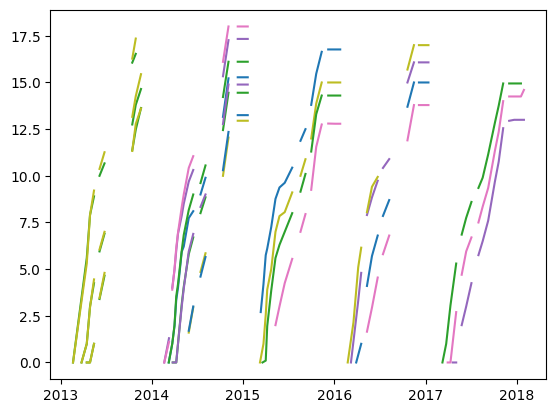

In [37]:
# Add in FLN data
MeanData.loc[:,'FLN'] = np.nan
MeanData.loc[:,'Stage'] = ''
Sims = MeanData.SimulationName.drop_duplicates()
for sim in Sims:
    simfilter = MeanData.SimulationName==sim
    plt.plot(MeanData.loc[simfilter,'SampleDate'],MeanData.loc[simfilter,'NumLigules'])
    NewSeries = pd.Series(index = MeanData.columns,dtype='float64')
    NewSeries.SimulationName = sim
    NewSeries.FLN = MeanData.loc[simfilter,'NumLigules'].max()
    NewSeries.GS32DAS = MeanData.loc[simfilter,'GS32DAS'].iloc[0]
    NewSeries.GS65DAS = MeanData.loc[simfilter,'GS65DAS'].iloc[0]
    NewSeries.GS90DAS = MeanData.loc[simfilter,'GS90DAS'].iloc[0]
    NewSeries.Stage = 'HarvestRipe'
    #NewSeries.SampleDate = MeanData.loc[simfilter,'SampleDate'].max()
    MeanData = pd.concat([MeanData,NewSeries],ignore_index=True)
    simfilter = MeanData.SimulationName==sim
    plt.plot(MeanData.loc[simfilter,'SampleDate'],MeanData.loc[simfilter,'FLN'],'o',ms=10)

In [38]:
Data.GreenLeafBiomass

SampleDate
2013-11-19    NaN
2013-10-29    NaN
2013-10-29    NaN
2013-10-29    NaN
2013-10-29    NaN
             ... 
2017-07-18    NaN
2017-07-18    NaN
2017-07-18    NaN
2017-07-18    NaN
2017-04-19    0.0
Name: GreenLeafBiomass, Length: 229687, dtype: float64

In [39]:
# Do some unit conversions
ToConvert = ['TotalBiomass',
 'TotalLeafBiomass',
 'GreenLeafBiomass',
 'DeadLeafBiomass',
 'StemBiomass',
 'Grain0Percent',
 'EarBiomass',
 'ChaffBiomass']

for v in ToConvert:
    MeanData.loc[:,v] = MeanData.loc[:,v]/10

MeanData.loc[:,'1000GrainWt0Pc'] = MeanData.loc[:,'1000GrainWt0Pc']/1000

In [40]:
NameMap = {'SimulationName':'SimulationName',
           'SampleDate':'Clock.Today',
           'Stage':'Wheat.Phenology.CurrentStageName',
           'NumLeafTips':'Wheat.Leaf.AppearedCohortNo',
           'NumLigules':'Wheat.Leaf.ExpandedCohortNo',
           'FLN':'Wheat.Structure.FinalLeafNumber',
           'TotalBiomass':'Wheat.AboveGround.Wt',
           'TotalLeafBiomass':'Wheat.Leaf.Wt', 
           'GreenLeafBiomass':'Wheat.Leaf.Live.Wt',
           'DeadLeafBiomass':'Wheat.Leaf.Dead.Wt',
           'StemBiomass':'Wheat.Stem.Wt',
           'LAI':'Wheat.Leaf.LAI',
           'StemsMSq':'Wheat.Structure.TotalStemPopn',
           'ReassessmentGS':'Wheat.Phenology.Zadok.Stage',
           'Grain0Percent':'Wheat.Grain.Wt',
           'EarBiomass':'Wheat.Ear.Wt',
           'ChaffBiomass':'Wheat.Spike.Wt',
           'GrainsMSq':'Wheat.Grain.Number',
           '1000GrainWt0Pc':'Wheat.Grain.Size',
           'I/Io':'Wheat.Leaf.CoverTotal',
           'GS32DAS':'Wheat.Phenology.TerminalSpikeletDAS',
           'GS65DAS':'Wheat.Phenology.FloweringDAS',
           'GS90DAS':'Wheat.Phenology.MaturityDAS',
           }
UsefulVariables = list(NameMap)
APSIMExports = MeanData.loc[:,UsefulVariables]
APSIMExports.columns = [NameMap[x] for x in UsefulVariables]
APSIMExports.where(APSIMExports!=0,np.nan,inplace=True)
for x in APSIMExports.index:
    if ~np.isnan(APSIMExports.loc[x,'Wheat.Grain.Size']):
        APSIMExports.loc[x,'Wheat.Phenology.CurrentStageName'] = 'HarvestRipe'
APSIMExports.to_excel('C:\\GitHubRepos\\ApsimX\\Tests\\Validation\\Wheat\\2020Results.xlsx',sheet_name='Observed',index=False)

In [41]:
APSIMExports.to_excel('C:\\GitHubRepos\\ApsimX\\Tests\\Validation\\Wheat\\2020Results.xlsx',sheet_name='Observed',index=False)

## Graphs of stuff

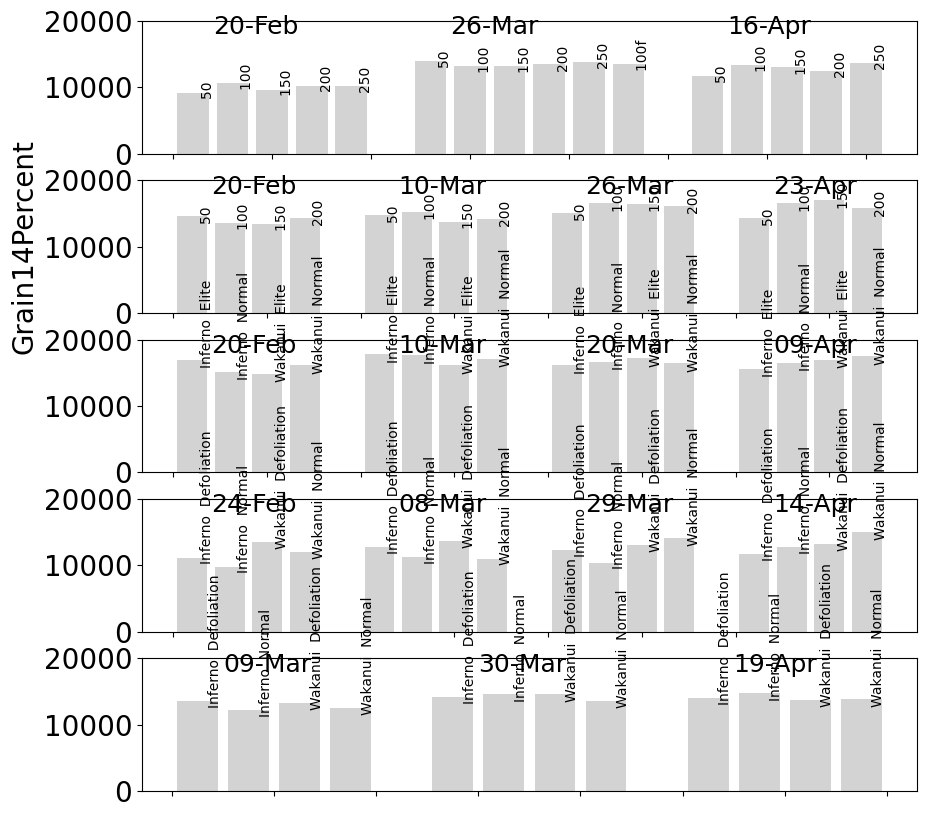

In [42]:
Variable = 'Grain14Percent'
Graph = plt.figure(figsize=(10,10))
pos=1
TreatInLabel = pd.Series(index = YearList, data = [[1],[1],[0,2],[0,2],[0,2]])
Yup = FindAxisMax(IndexedData.loc[:,Variable ])
for Year in YearList:
    Pannel = Graph.add_subplot(len(YearList),1,pos)
    plt.ylim(0,Yup)
    plt.tick_params(labelsize=20)
    Pannel.tick_params(labelbottom=False)
    if Year == 2014:
        plt.ylabel(Variable, fontsize = 20)
    GraphData = pd.to_numeric(IndexedData[GS90Filter].loc[Year,Variable].dropna())
    MeanData = GraphData.groupby(GraphData.index.names).mean()
    Left = 0
    count = 0
    LastSowIndex = MeanData.index[count][0]
    for Treat in MeanData.index:
        SowLab = pd.to_datetime(MeanData.index[count][0]).strftime('%d-%b')
        if count == 0:
            plt.text(Left+1,Yup*0.9,SowLab,fontsize=18)
        if LastSowIndex != MeanData.index[count][0]:
            Left+=1
            plt.text(Left+1,Yup*0.9,SowLab,fontsize=18)
        plt.bar(x=Left+.5,height=MeanData[count],color='lightgrey')
        FullLab = MeanData.index[count][1:]
        forShort = TreatInLabel[Year]
        LabMembers = [FullLab[i] for i in forShort]
        Label = ''
        for member in LabMembers:
            Label += str(member)
            Label += '  '
        height = MeanData[count] * 0.95
        plt.text(Left+.7,height, Label,rotation=90, fontsize=10)
        Left += 1
        LastSowIndex = MeanData.index[count][0]
        count += 1
    pos +=1

## Time series graph

(0.0, 1.0)

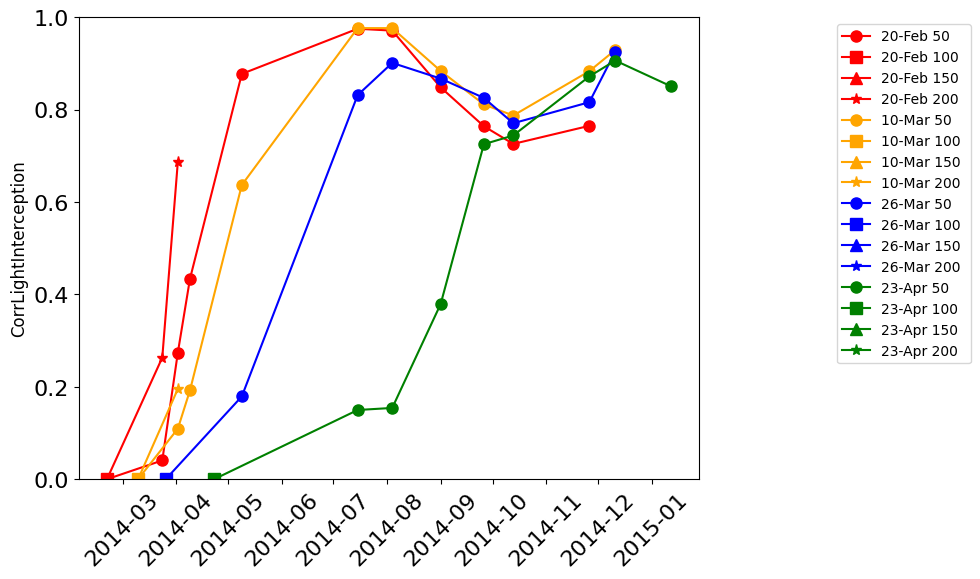

In [43]:
Year = 2014
Variable = 'CorrLightInterception'
MakeTimeCoarseGraph(Year,Variable)
plt.ylim(0,1)

(0.0, 1.0)

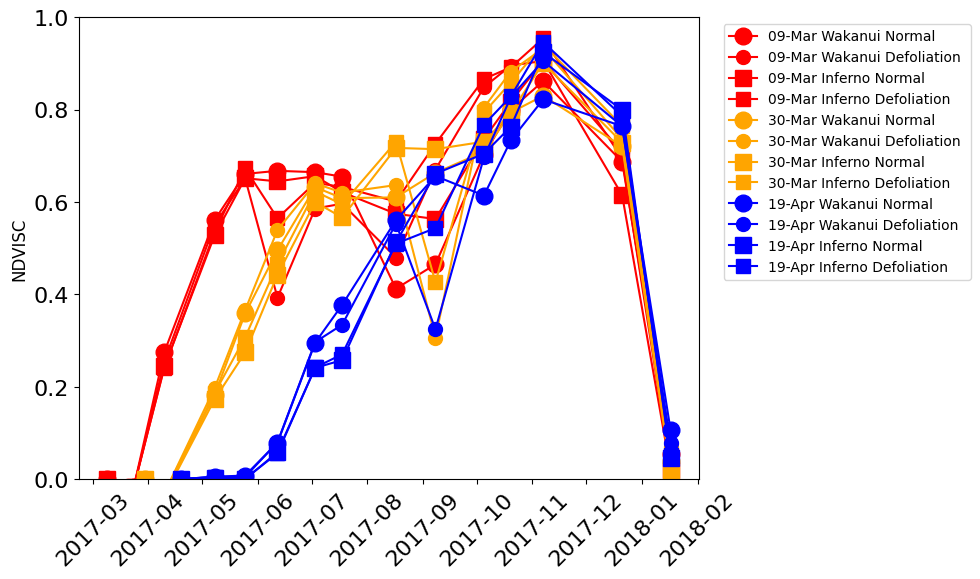

In [44]:
Year = 2017
Variable = 'NDVISC'
MakeTimeCoarseGraph(Year,Variable)
plt.ylim(0,1)

(0.0, 1.0)

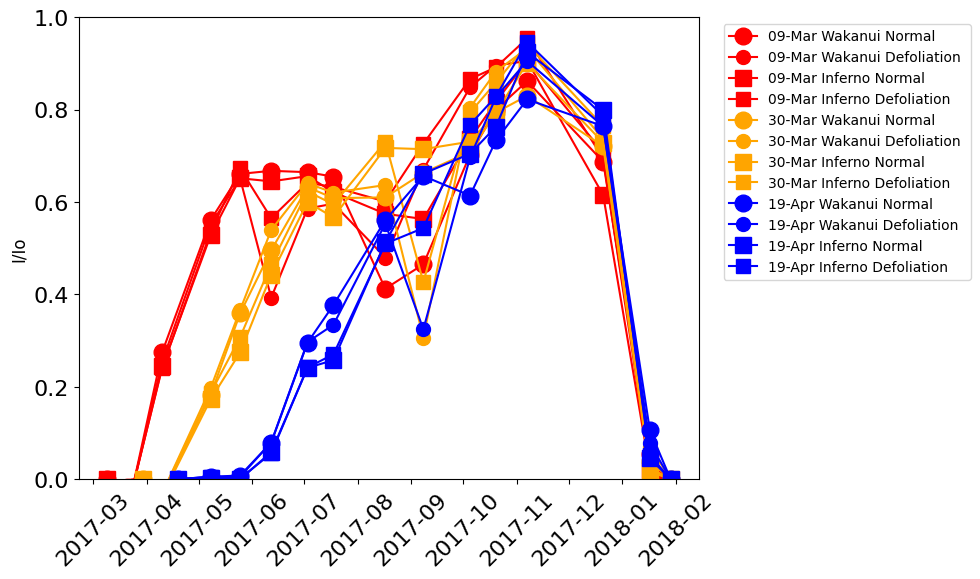

In [45]:
Year = 2017
Variable = 'I/Io'
MakeTimeCoarseGraph(Year,Variable)
plt.ylim(0,1)

In [46]:
GrandIndex.loc[:,'CommonTreat'] = (GrandIndex.Cultivar == 'Wakanui') & (GrandIndex.PGRCanopyMgmtTrt == 'Normal')
Data.loc[:,'CommonTreat'] = [GrandIndex.loc[(Data.iloc[x,1],Data.iloc[x,6]),'CommonTreat'] for x in range(Data.index.size)]

In [47]:
GrandIndex

SowingDate Cultivar PlantPopn PGRCanopyMgmtTrt  CommonTreat
2013 1a     20-Feb  Wakanui        50           Normal         True
     1b     20-Feb  Wakanui       100           Normal         True
     1c     20-Feb  Wakanui       150           Normal         True
     1d     20-Feb  Wakanui       200           Normal         True
     1e     20-Feb  Wakanui       250           Normal         True
...            ...      ...       ...              ...          ...
2017 2d     30-Mar  Inferno       150      Defoliation        False
     3a     19-Apr  Wakanui       150           Normal         True
     3b     19-Apr  Wakanui       150      Defoliation        False
     3c     19-Apr  Inferno       150           Normal        False
     3d     19-Apr  Inferno       150      Defoliation        False

[76 rows x 5 columns]

In [48]:
AxisLabel = pd.DataFrame(index=['CorrLightInterception','NDVISC'],columns=['graphnames'],data=['Total Light Interception','Green Area Light Interception'])

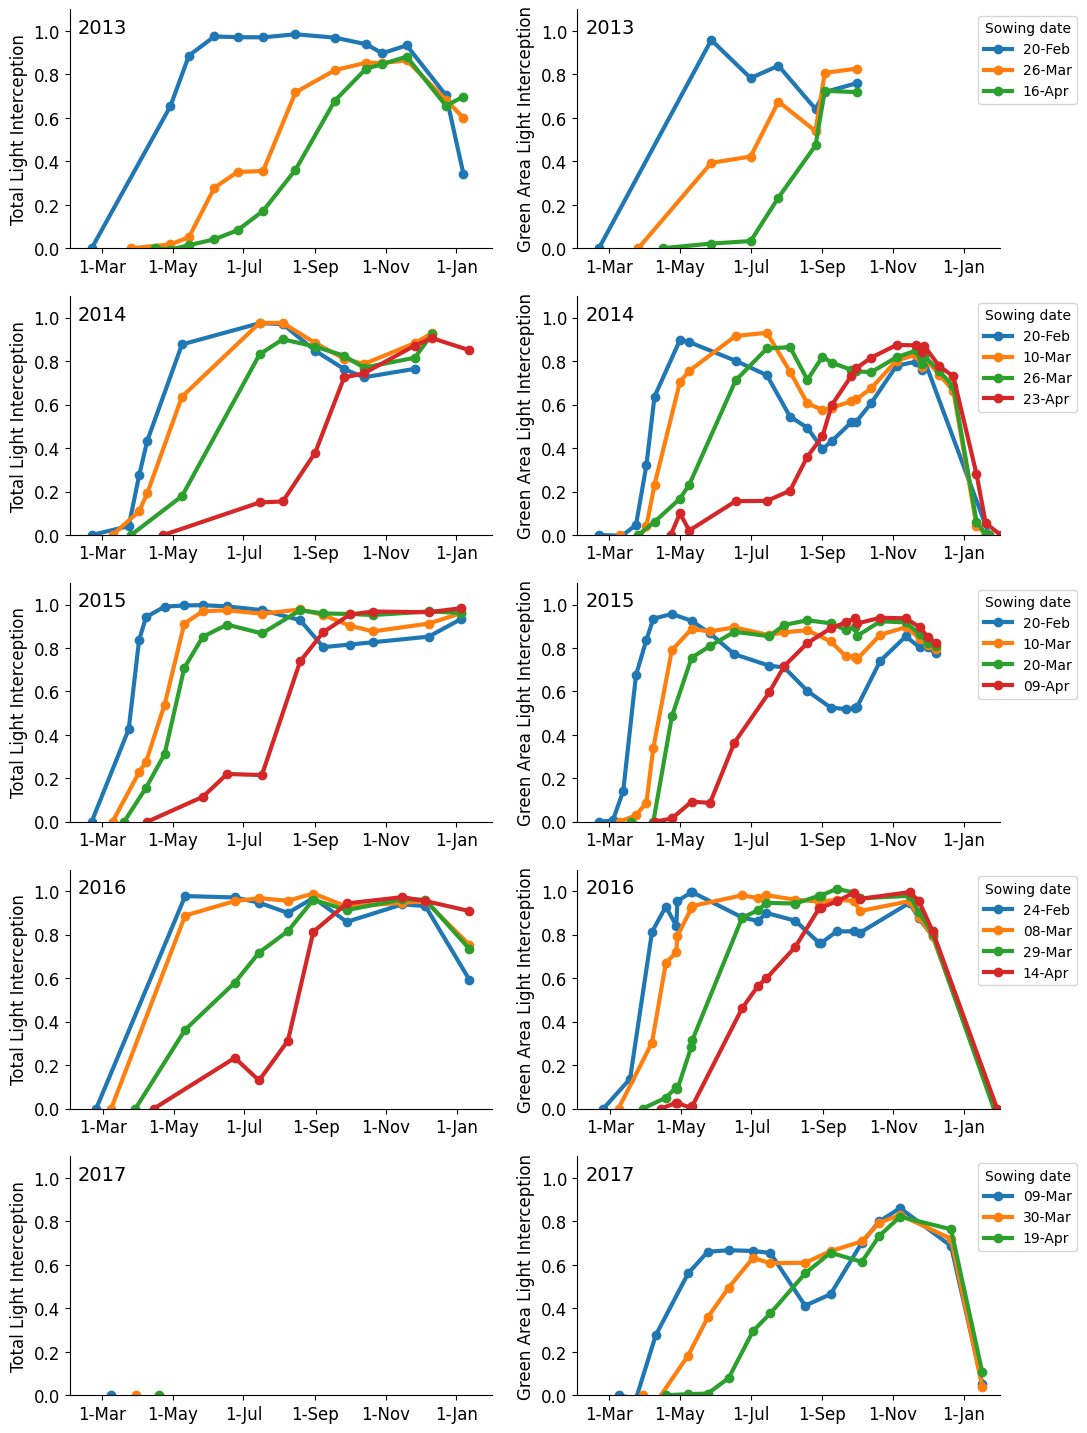

In [49]:
GraphData = Data.loc[Data.CommonTreat == True,['YearSown','TrtNum','SowingDate','CorrLightInterception','NDVISC']]
Graph = plt.figure(figsize=(12,18))
Years = [2013,2014,2015,2016,2017]
pos = 1
for y in Years:
    for v in ['CorrLightInterception','NDVISC']:
        ax = Graph.add_subplot(len(Years),2,pos)
        GraphTreats = GrandIndex.loc[GrandIndex.CommonTreat==True,:].loc[y,'SowingDate'].drop_duplicates()
        for Treat in GraphTreats.index:
            Filter = (Data.YearSown == y) & (Data.TrtNum == Treat)
            GraphData = Data.loc[Filter,v].dropna().groupby(level='SampleDate').mean()
    #         col = Demarkers[0][GraphTreats.loc[Treat][0]]
    #         mark = Demarkers[1][GraphTreats.loc[Treat][1]]
    #         try:
    #             size = Demarkers[2][GraphTreats.loc[Treat][2]]
    #         except:
    #             size = 8
            plt.plot(GraphData,'-o',lw=3,label=GrandIndex.loc[(y,Treat),'SowingDate'])
        start = dt.date(y,2,1)
        end = dt.date(y+1,2,1)
        plt.xlim(start,end)
        plt.ylim(0,1.1)
        #plt.xticks(rotation=45)
        plt.ylabel(AxisLabel.loc[v,'graphnames'],fontsize=12)
        plt.tick_params(labelsize=12)
        if v == 'NDVISC':
            plt.legend(bbox_to_anchor=(1.2, 1),numpoints=1,title='Sowing date')   
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%#d-%b'))
        plt.text(0.02,0.9,str(y),transform=ax.transAxes,fontsize=14)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        pos += 1 
        
Graph.savefig('Radiation Interception.jpg')

In [50]:
Data.loc[Data.CommonTreat == True,['YearSown','TrtNum','SowingDate','CorrLightInterception','NDVISC']]

YearSown TrtNum           SowingDate  CorrLightInterception  \
SampleDate                                                                
2013-11-19      2013     1e  2013-02-20 00:00:00               0.904417   
2013-10-29      2013     1c  2013-02-20 00:00:00               0.871607   
2013-10-29      2013     1c  2013-02-20 00:00:00               0.947645   
2013-10-29      2013     1c  2013-02-20 00:00:00               0.897792   
2013-10-29      2013     1c  2013-02-20 00:00:00               0.976773   
...              ...    ...                  ...                    ...   
2017-07-18      2017     3a  2017-04-19 00:00:00                    NaN   
2017-07-18      2017     3a  2017-04-19 00:00:00                    NaN   
2017-07-18      2017     3a  2017-04-19 00:00:00                    NaN   
2017-07-18      2017     3a  2017-04-19 00:00:00                    NaN   
2017-07-18      2017     3a  2017-04-19 00:00:00                    NaN   

              NDVISC  
SampleDate            
2013-11-19       NaN  
2013-10-29       NaN  
2013-10-29       NaN  
2013-10-29       NaN  
2013-10-29       NaN  
...              ...  
2017-07-18  0.243237  
2017-07-18  0.424264  
2017-07-18  0.434398  
2017-07-18  0.399889  
2017-07-18  0.353574  

[104952 rows x 5 columns]

## Biomass model graph

In [51]:
BiomassAnalysis.loc[2015].iloc[280:,:]

I/Io   Radn   Temp    IntRadn   RUE       PotDM
TrtNum Date                                                           
1a     2015-11-27  0.802925  16.36  18.40  13.135858  15.0  197.037868
       2015-11-28  0.802946  32.54  17.10  26.127862  15.0  391.917935
       2015-11-29  0.802961  20.82  12.50   16.71765  12.5  208.970628
       2015-11-30   0.80298  20.04  15.35  16.091713  15.0  241.375691
       2015-12-01  0.803001  22.53  17.25  18.091602  15.0  271.374035
...                     ...    ...    ...        ...   ...         ...
4d     2016-02-07       NaN    NaN    NaN        NaN   NaN         NaN
       2016-02-08       NaN    NaN    NaN        NaN   NaN         NaN
       2016-02-09       NaN    NaN    NaN        NaN   NaN         NaN
       2016-02-10       NaN    NaN    NaN        NaN   NaN         NaN
       2016-02-11       NaN    NaN    NaN        NaN   NaN         NaN

[4972 rows x 6 columns]

Text(0, 0.5, 'Total Biomass (t/ha)')

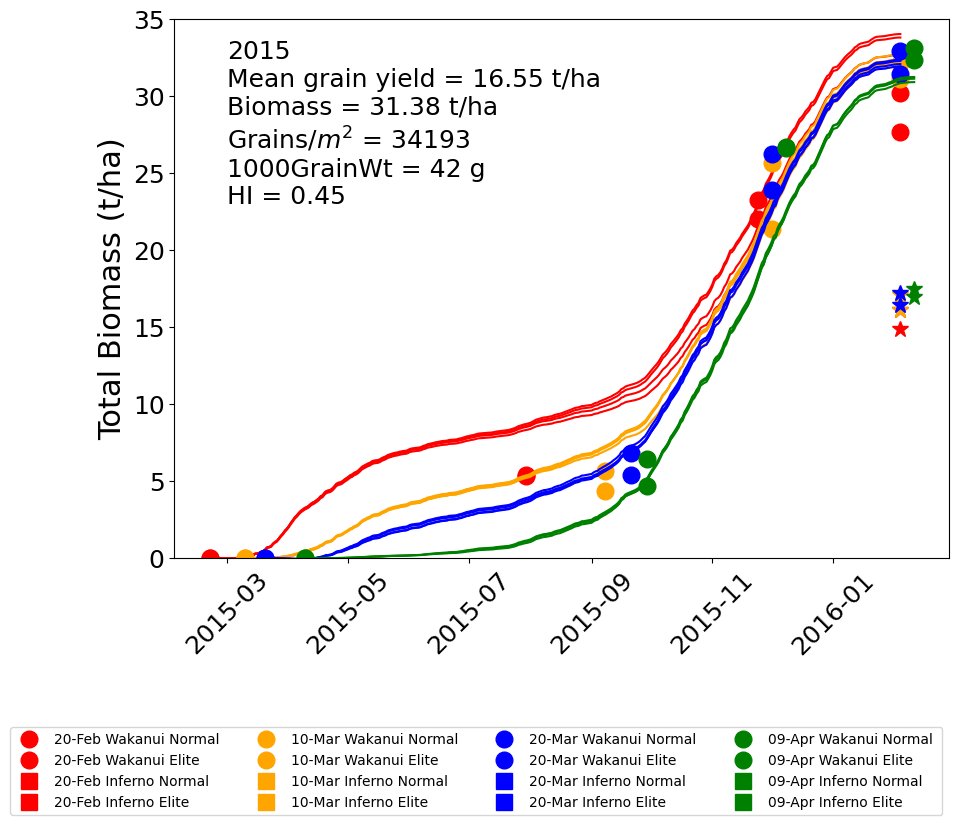

In [52]:
Year = 2015
GraphData = Data.loc[Data.YearSown==Year]
GraphTreats = MakeYearIndex(Year)
for var in GraphTreats.columns:
        LevelList = GraphTreats.loc[:,var].drop_duplicates().values
        if LevelList.size <= 1:
            GraphTreats.drop(var,axis=1,inplace=True)
Demarkers = SetSymbols(GraphTreats)
Graph = plt.figure(figsize=(10,7))

for Treat in GraphTreats.index:
    Filter = (Data.YearSown == Year) & (Data.TrtNum == Treat) & (Data.Cultivar == 'Wakanui')
    GraphData = Data.loc[Filter,'TotalBiomass'].dropna().groupby(level='SampleDate').mean()/1000
    col = Demarkers[0][GraphTreats.loc[Treat][0]]
    mark = Demarkers[1][GraphTreats.loc[Treat][1]]
    plt.plot(GraphData,mark,color = col, markersize = 12,label = MakeLabel(GraphTreats.loc[Treat,:]))
    Potbiomass = BiomassAnalysis.loc[(Year,Treat),'PotDM'].cumsum()
    plt.plot(Potbiomass/1000,'-', color=col)
    try:
        YieldData = Data.loc[Filter,'Grain14Percent'].dropna().mean()/1000
        Date =  Data.loc[Filter,'Grain14Percent'].dropna().index[0]
        plt.plot(Date,YieldData,'*',color = col, markersize = 12)
    except:
        fail = 'yes'
MeanYield = Data.loc[(Data.YearSown == Year)&(Data.Cultivar == 'Wakanui'),'Grain14Percent'].dropna().mean()/1000
MeanBiomass = Data.loc[(Data.YearSown == Year)&(Data.Cultivar == 'Wakanui')&(Data.SampleGS=='GS90'),'TotalBiomass'].dropna().mean()/1000
MeanGrainSize = IndexedData.loc[(IndexedData.YearSown == Year)&(IndexedData.Cultivar == 'Wakanui'),'1000GrainWt0Pc'].dropna().mean()
MeanGrainNumber = Data.loc[(Data.YearSown == Year)&(Data.Cultivar == 'Wakanui'),'GrainsMSq'].dropna().mean()
MeanHI = Data.loc[(Data.YearSown == Year)&(Data.Cultivar == 'Wakanui'),'HI'].dropna().mean()
PlotDate = dt.datetime(Year,3,1)
plt.text(PlotDate,23,str(Year)+'\nMean grain yield = '+'%.2f'%MeanYield + ' t/ha'+
         '\n'+ 'Biomass = ' + '%.2f'%MeanBiomass + ' t/ha' +
         '\n'+ r'Grains/$m^2$ = '+'%.0f'%MeanGrainNumber +
         '\n'+ '1000GrainWt = ' + '%.0f'%MeanGrainSize + ' g'+
         '\n'+ 'HI = '+ '%.2f'%MeanHI,fontsize=18)
plt.legend(bbox_to_anchor=(1, -0.3),numpoints=1,ncol=4)
plt.xticks(rotation=45)
plt.ylim(0,35)
plt.tick_params(labelsize=18)
plt.ylabel('Total Biomass (t/ha)',fontsize=22)

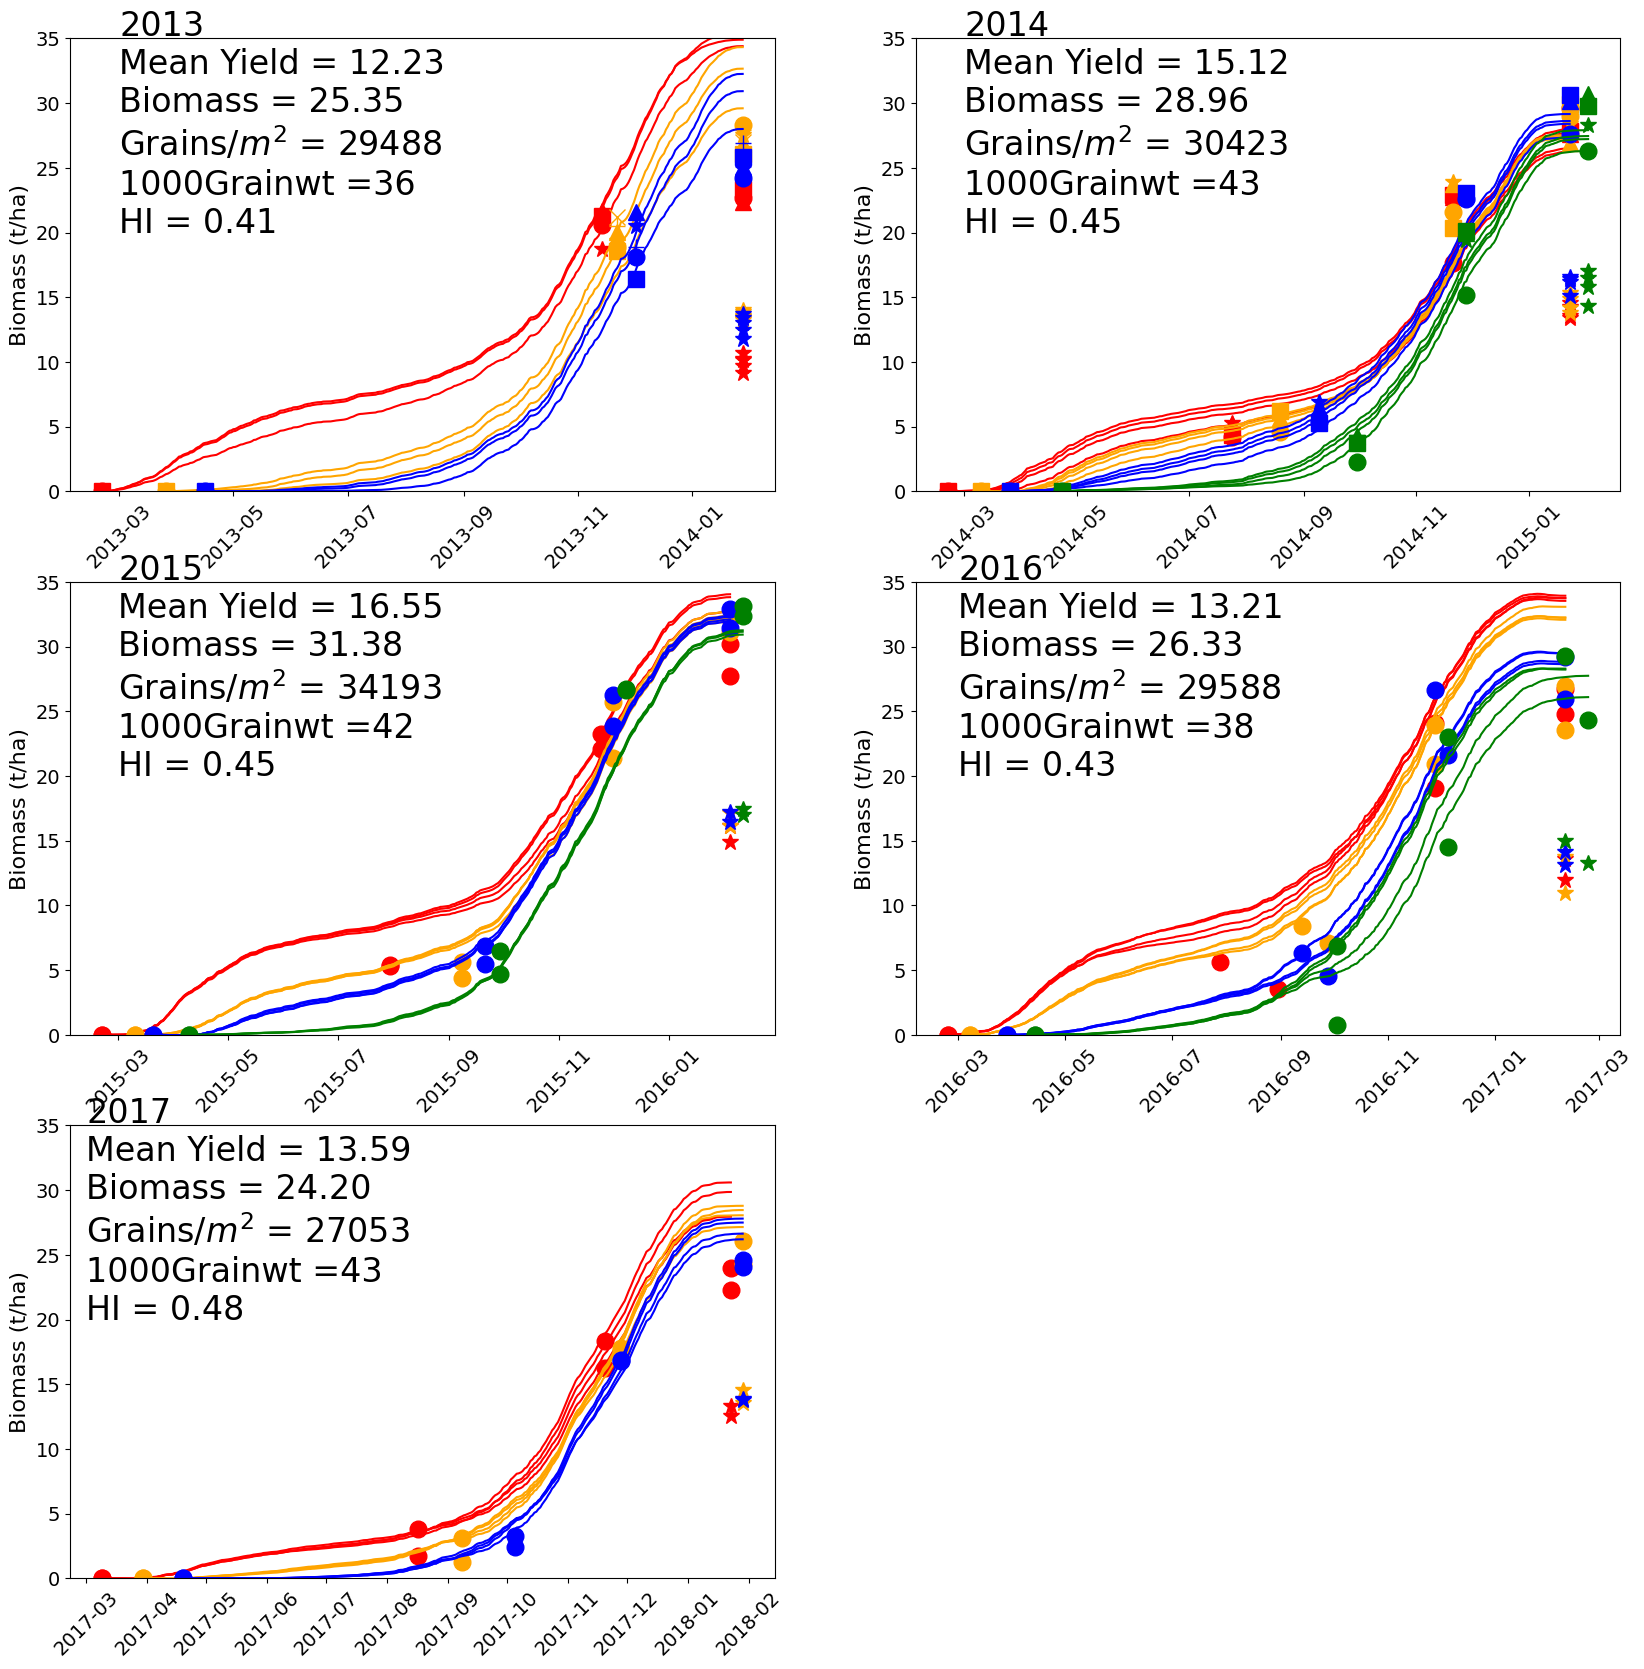

In [53]:
Graph = plt.figure(figsize=(20,20))
Pos =1
for Year in YearList:
    Graph.add_subplot(3,2,Pos)
    GraphData = Data.loc[Data.YearSown==Year]
    GraphTreats = MakeYearIndex(Year)
    try:
        GraphTreats.drop("CommonTreat",axis=1,inplace=True)
    except:
        do = "Nothing"
    for var in GraphTreats.columns:
        LevelList = GraphTreats.loc[:,var].drop_duplicates().values
        if LevelList.size <= 1:
            GraphTreats.drop(var,axis=1,inplace=True)
    Demarkers = SetSymbols(GraphTreats)
    for Treat in GraphTreats.index:
        Filter = (Data.YearSown == Year) & (Data.TrtNum == Treat) & (Data.Cultivar == 'Wakanui')
        GraphData = Data.loc[Filter,'TotalBiomass'].dropna().groupby(level='SampleDate').mean()/1000
        col = Demarkers[0][GraphTreats.loc[Treat][0]]
        mark = Demarkers[1][GraphTreats.loc[Treat][1]]
        plt.plot(GraphData,mark,color = col, markersize = 12,label = MakeLabel(GraphTreats.loc[Treat,:]))
        Potbiomass = BiomassAnalysis.loc[(Year,Treat),'PotDM'].cumsum()
        plt.plot(Potbiomass/1000,'-', color=col)
        try:
            YieldData = Data.loc[Filter,'Grain14Percent'].dropna().mean()/1000
            Date =  Data.loc[Filter,'Grain14Percent'].dropna().index[0]
            plt.plot(Date,YieldData,'*',color = col, markersize = 12)
        except:
            fail = 'yes'
    MeanYield = Data.loc[(Data.YearSown == Year)&(Data.Cultivar == 'Wakanui'),'Grain14Percent'].dropna().mean()/1000
    MeanBiomass = Data.loc[(Data.YearSown == Year)&(Data.Cultivar == 'Wakanui')&(Data.SampleGS=='GS90'),'TotalBiomass'].dropna().mean()/1000
    MeanGrainSize = IndexedData.loc[(IndexedData.YearSown == Year)&(IndexedData.Cultivar == 'Wakanui'),'1000GrainWt0Pc'].dropna().mean()
    MeanGrainNumber = Data.loc[(Data.YearSown == Year)&(Data.Cultivar == 'Wakanui'),'GrainsMSq'].dropna().mean()
    MeanHI = Data.loc[(Data.YearSown == Year)&(Data.Cultivar == 'Wakanui'),'HI'].dropna().mean()
    PlotDate = dt.datetime(Year,3,1)
    plt.text(PlotDate,20,str(Year)+'\nMean Yield = '+'%.2f'%MeanYield +
             '\n'+ 'Biomass = ' + '%.2f'%MeanBiomass +
             '\n'+ r'Grains/$m^2$ = '+'%.0f'%MeanGrainNumber +
             '\n'+ '1000Grainwt =' + '%.0f'%MeanGrainSize +
             '\n'+ 'HI = '+ '%.2f'%MeanHI,fontsize=24)
    Pos +=1
    plt.xticks(rotation=45)
    plt.ylim(0,35)
    plt.tick_params(labelsize=14)
    plt.ylabel('Biomass (t/ha)',fontsize=16)

## Harvest Graph

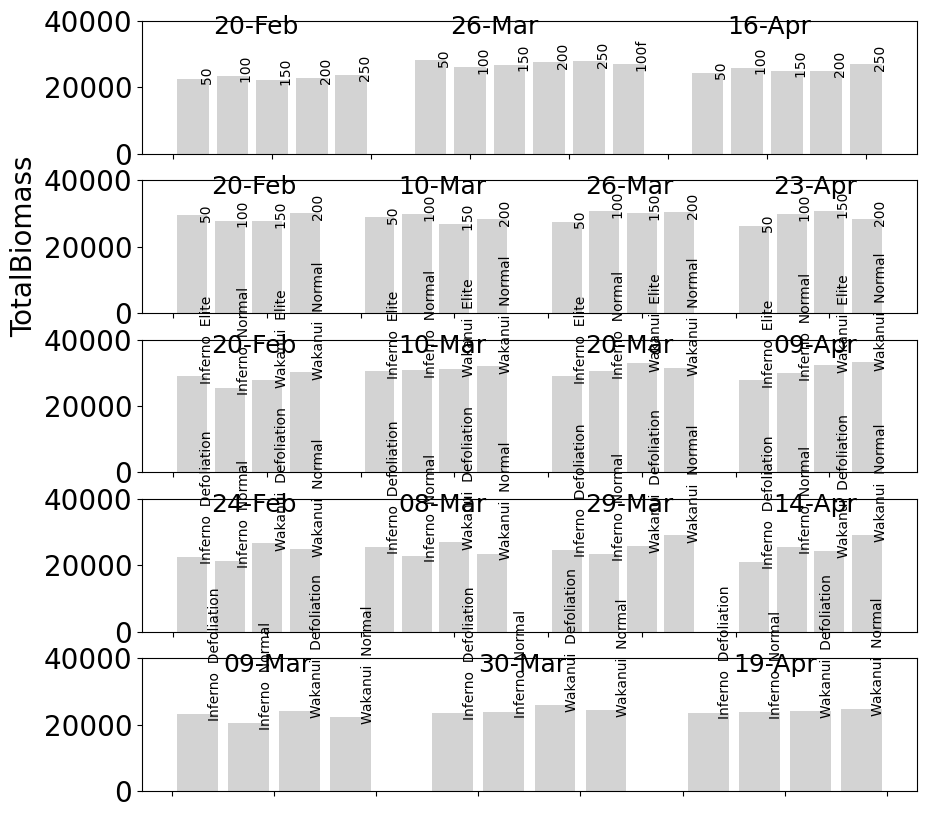

In [54]:
Variable = 'TotalBiomass'
MakeHarvestVariableGraph(Variable)

## Harvest correlations

In [55]:
['GrainsMSq','EarsMSq','StemsMSq','GrainsEar','1000GrainWt0Pc','GrainsPerGramStem',
 'TotalBiomass','HI','StemBiomass','StemBiomass','AnthesisBiomass','AnthesisStem']

['GrainsMSq',
 'EarsMSq',
 'StemsMSq',
 'GrainsEar',
 '1000GrainWt0Pc',
 'GrainsPerGramStem',
 'TotalBiomass',
 'HI',
 'StemBiomass',
 'StemBiomass',
 'AnthesisBiomass',
 'AnthesisStem']

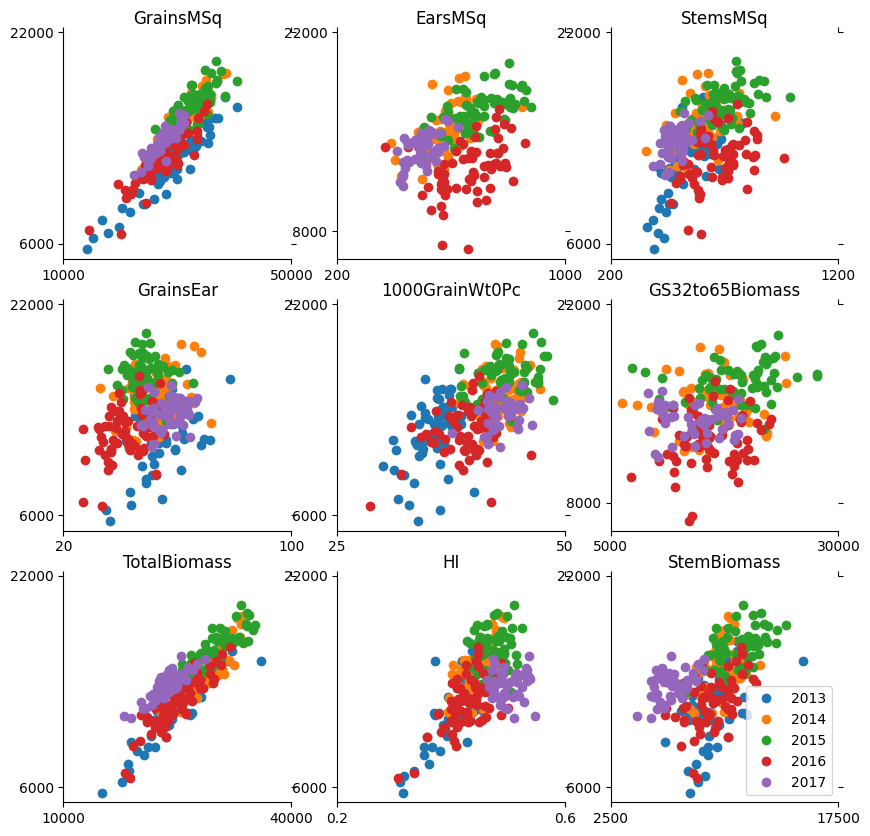

In [56]:
YVariable = 'Grain14Percent'
ComponentPairs = [['GrainsMSq',YVariable],
                  ['EarsMSq',YVariable],
                  ['StemsMSq',YVariable],
                  ['GrainsEar',YVariable],
                  ['1000GrainWt0Pc',YVariable],
                  ['GS32to65Biomass',YVariable],
                  ['TotalBiomass',YVariable],
                  ['HI',YVariable],
                  ['StemBiomass',YVariable]]
Graph = plt.figure(figsize=(10,10))
pos = 1
for Component in ComponentPairs:
    Ax = Graph.add_subplot(3,3,pos)
    Ax.spines['right'].set_visible(False)
    Ax.spines['top'].set_visible(False)
    plt.tick_params(axis='x', which='both', bottom='on',top='off', labelbottom='on')
    plt.tick_params(axis='y', which='both', left='on',right='off', labelbottom='on')
    for Year in YearList:
        XData = IndexedData.loc[Year,Component[0]]
        YData = IndexedData.loc[Year,Component[1]]
        plt.plot(XData,YData,'o',label=Year)
        #plt.ylabel(Component[1])
        plt.title(Component[0])
    Ax.set_xticks([Ax.get_xticks()[0],Ax.get_xticks()[-1]])
    Ax.set_yticks([Ax.get_yticks()[1],Ax.get_yticks()[-1]])
    #Ax.set_xticklabels(['Less','More'])
    #Ax.set_yticklabels(['Modest','Jolly Good'])
    if pos == 9:
        plt.legend(loc=0,numpoints=1)
    pos+=1

In [57]:
IndexedData.columns

Index(['TrialCode', 'YearSown', 'Farmer', 'Location', 'Plot', 'TrialCodePlot',
       'TrtNum', 'Block', 'Cultivar', 'SowingDate', 'PlantPopn', 'PGRTrt',
       'PGRTiming', 'PGRCanopyMgmtTrt', 'NTrt', 'SampleDate', 'ApproxGS',
       'SampleGS', 'ReassessmentGS', 'PlantNum', 'LeafNum', 'NumLeafTips',
       'NumLigules', 'ttFeb', 'ttMar', 'ttApr', 'LeafPositionNum',
       'LeafPosition', 'AvLeafSize', 'AvLeafWeight', 'AvSLA',
       'PercentSenescence', 'NumGreenLeaves', 'NumSenescingLeaves',
       'NumDeadLeaves', 'TotalBiomass', 'Grain0Percent', 'Grain14Percent',
       'StrawBiomass', 'StemBiomass', 'EarBiomass', 'ChaffBiomass',
       'TotalLeafBiomass', 'GreenLeafBiomass', 'DeadLeafBiomass',
       'GreenLeafStemRatio', 'AvStemLength', 'AvStemDW', 'StemsMSq', 'EarsMSq',
       'GrainsMSq', 'GrainsEar', 'HI', 'GrainMoisture', 'ThousandGrainWeight',
       'HectolitreGrainWeight', 'IndividGrainWt14Percent', 'LAI',
       'CorrLightInterception', 'CorrLAI', 'RED', 'NIR', 'NDVI', '

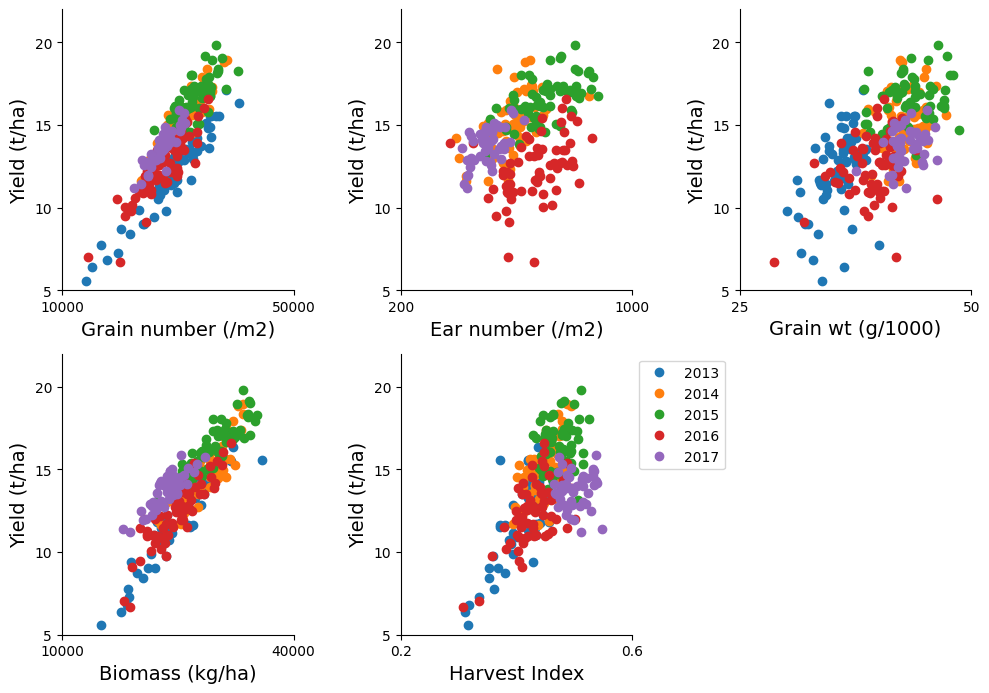

In [58]:
YVariable = 'Grain14Percent'
ComponentPairs = [['GrainsMSq',YVariable,'Grain number (/m2)'],
                  ['EarsMSq',YVariable,'Ear number (/m2)'],
                  ['1000GrainWt0Pc',YVariable,'Grain wt (g/1000)'],
                  ['TotalBiomass',YVariable,'Biomass (kg/ha)'],
                  ['HI',YVariable,'Harvest Index']]
                  
Graph = plt.figure(figsize=(10,10))
pos = 1
for Component in ComponentPairs:
    Ax = Graph.add_subplot(3,3,pos)
    for Year in YearList:
        XData = IndexedData.loc[Year,Component[0]]
        YData = IndexedData.loc[Year,Component[1]]
        plt.plot(XData,YData,'o',label=Year)
        #plt.ylabel(Component[1])
    #plt.text(0.02,0.95,Component[2],transform=Ax.transAxes,fontsize=14)
    plt.xlabel(Component[2],fontsize=14)
    plt.ylabel('Yield (t/ha)',fontsize=14)
    Ax.set_xticks([Ax.get_xticks()[0],Ax.get_xticks()[-1]])
    Ax.set_yticks([5000,10000,15000,20000])
    Ax.set_yticklabels([5,10,15,20])
    Ax.spines['right'].set_visible(False)
    Ax.spines['top'].set_visible(False)
    plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom='on')
    plt.tick_params(axis='y', which='both', left=True,right=False, labelleft='on')
    plt.ylim(5000,22000)
    #Ax.set_xticklabels(['Less','More'])
    #Ax.set_yticklabels(['Modest','Jolly Good'])
    if pos == 5:
        plt.legend(bbox_to_anchor=(1, 1),loc=0,numpoints=1)
    pos+=1
plt.tight_layout()
Graph.savefig('YieldCorelations.jpg')

In [59]:
Data.to_csv('2020_data.csv')

## Met data variables

<Axes: xlabel='YearSown,SowingDate,Cultivar,PlantPopn,PGRCanopyMgmtTrt'>

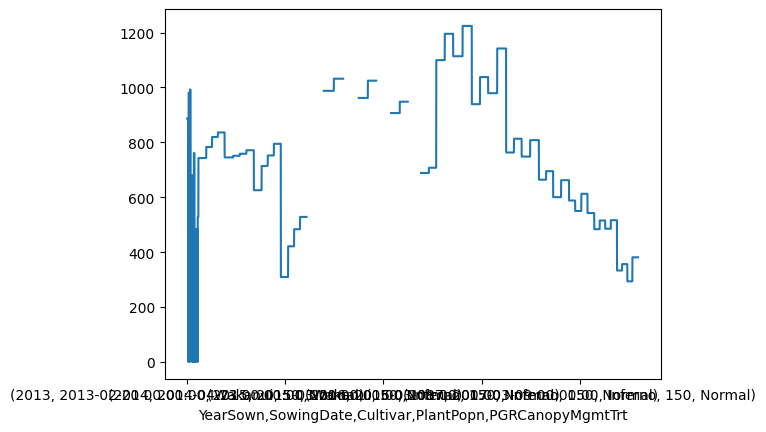

In [60]:
IndexedData.VegRadn.plot()

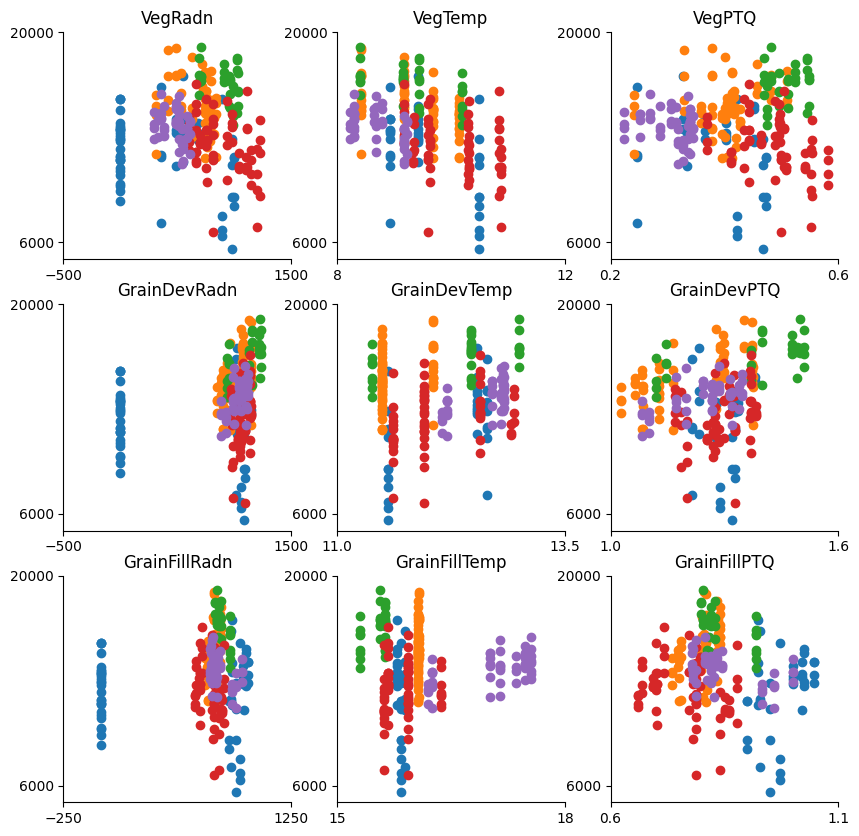

In [61]:
YVariable = 'Grain14Percent'
ComponentPairs = [['VegRadn',YVariable],
                  ['VegTemp',YVariable],
                  ['VegPTQ',YVariable],
                  ['GrainDevRadn',YVariable],
                  ['GrainDevTemp',YVariable],
                  ['GrainDevPTQ',YVariable],
                  ['GrainFillRadn',YVariable],
                  ['GrainFillTemp',YVariable],
                  ['GrainFillPTQ',YVariable]]
Graph = plt.figure(figsize=(10,10))
pos = 1
for Component in ComponentPairs:
    Ax = Graph.add_subplot(3,3,pos)
    Ax.spines['right'].set_visible(False)
    Ax.spines['top'].set_visible(False)
    plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True)
    plt.tick_params(axis='y', which='both', left=True,right=False, labelbottom=True)
    for Year in YearList:
        XData = IndexedData.loc[Year,Component[0]]#.groupby(level='SowingDate').mean()
        YData = pd.to_numeric(IndexedData.loc[Year,Component[1]])#.groupby(level='SowingDate').mean()
        plt.plot(XData,YData,'o',label=Year)
        #plt.ylabel(Component[1])
        plt.title(Component[0])
    Ax.set_xticks([Ax.get_xticks()[0],Ax.get_xticks()[-1]])
    Ax.set_yticks([Ax.get_yticks()[1],Ax.get_yticks()[-1]])
#     if pos == 9:
#         plt.legend(loc=0,numpoints=1)
    pos+=1

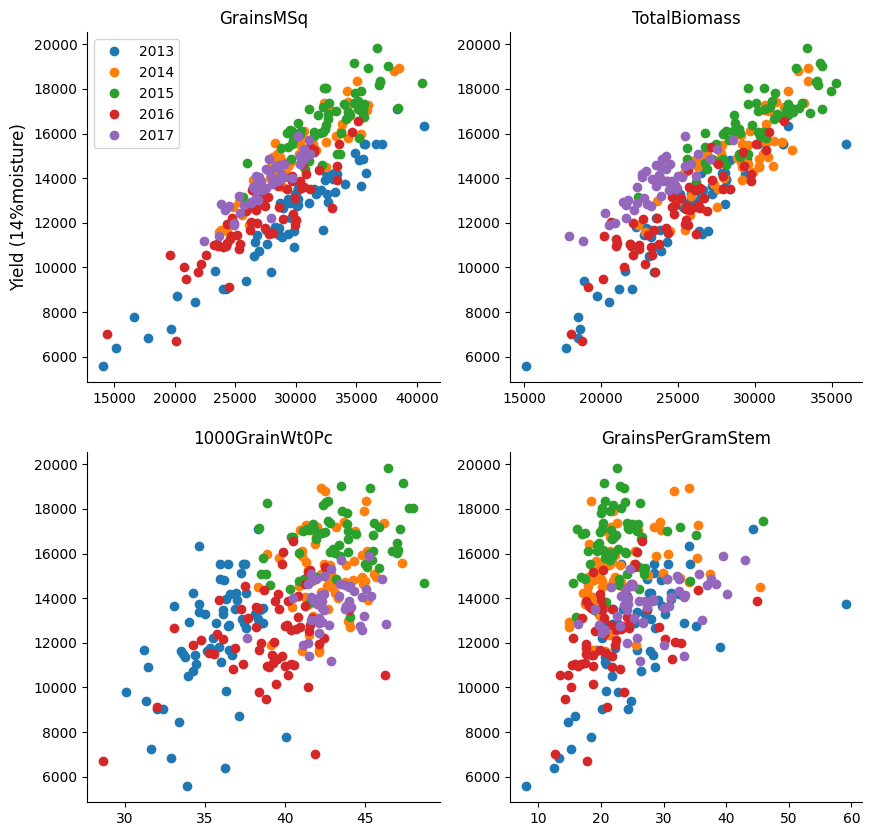

In [62]:
ComponentPairs = [['GrainsMSq','Grain14Percent'],
                  ['TotalBiomass','Grain14Percent'],
                  ['1000GrainWt0Pc','Grain14Percent'],
                 ['GrainsPerGramStem','Grain14Percent']]
Graph = plt.figure(figsize=(10,10))
pos = 1
for Component in ComponentPairs:
    Ax = Graph.add_subplot(2,2,pos)
    Ax.spines['right'].set_visible(False)
    Ax.spines['top'].set_visible(False)
    plt.tick_params(axis='x', which='both', bottom= True,top= False, labelbottom= True)
    plt.tick_params(axis='y', which='both', left= True,right= False, labelbottom= True)
    for Year in YearList:
        XData = IndexedData.loc[Year,Component[0]]
        YData = IndexedData.loc[Year,Component[1]]
        plt.plot(XData,YData,'o',label=Year)
        #plt.ylabel(Component[1])
        plt.title(Component[0])
    #Ax.set_xticks([Ax.get_xticks()[0],Ax.get_xticks()[-1]])
    #Ax.set_yticks([Ax.get_yticks()[1],Ax.get_yticks()[-1]])
    #Ax.set_xticklabels(['Less','More'])
    #Ax.set_yticklabels(['Modest','Jolly Good'])
    if pos == 1:
        plt.legend(loc=0,numpoints=1)
        plt.ylabel('Yield (14%moisture)',fontsize = 12)
    pos+=1

[]

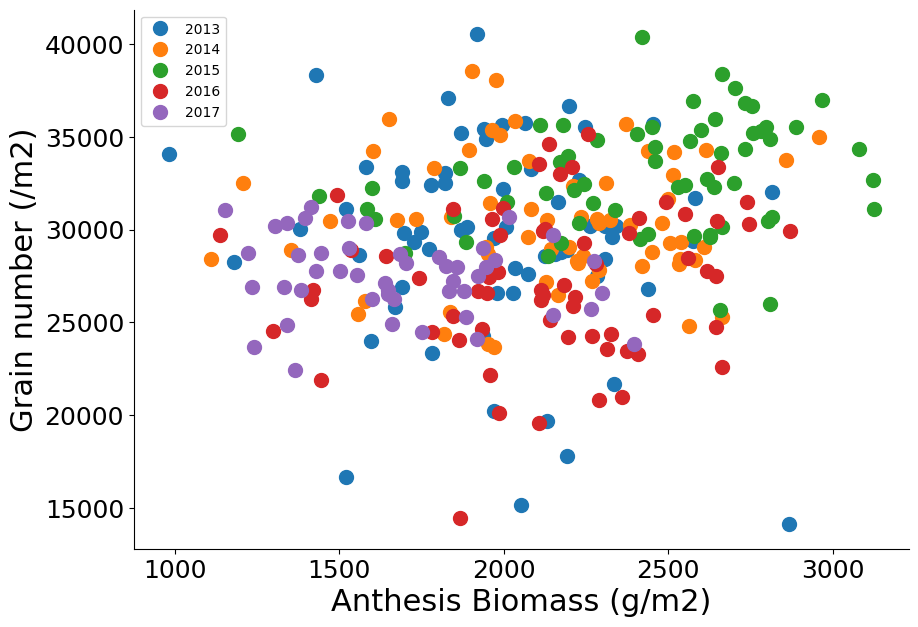

In [63]:
Graph = plt.figure(figsize=(10,7))
Ax = Graph.add_subplot(1,1,1)
Ax.spines['right'].set_visible(False)
Ax.spines['top'].set_visible(False)
plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True)
plt.tick_params(axis='y', which='both', left=True,right=False, labelbottom=True)
for Year in YearList:
    XData = IndexedData.loc[Year,'AnthesisBiomass']/10
    YData = IndexedData.loc[Year,'GrainsMSq']
    plt.plot(XData,YData,'o',label=Year,markersize = 10)
    #plt.ylabel(Component[1])
    #plt.title(Component[0])
plt.legend(loc=0,numpoints=1)
plt.ylabel('Grain number (/m2)',fontsize = 22)
plt.xlabel('Anthesis Biomass (g/m2)',fontsize = 22)
#plt.xlabel(r'$Grains /m^2$',fontsize = 22)
plt.tick_params(labelsize=18)
#Ax.xaxis.set_ticklabels([15,20,25,30,35,40])
#Ax.yaxis.set_ticklabels([4,6,8,10,12,14,16,18,20])
plt.plot()

## Single variable Harvest correlations

In [64]:
'GrainsMSq','Grain14Percent','EarsMSq','StemsMSq','GrainsEar',
'ThousandGrainWeight','GrainsPerGramStem','TotalBiomass','HI','StemBiomass'

('ThousandGrainWeight',
 'GrainsPerGramStem',
 'TotalBiomass',
 'HI',
 'StemBiomass')

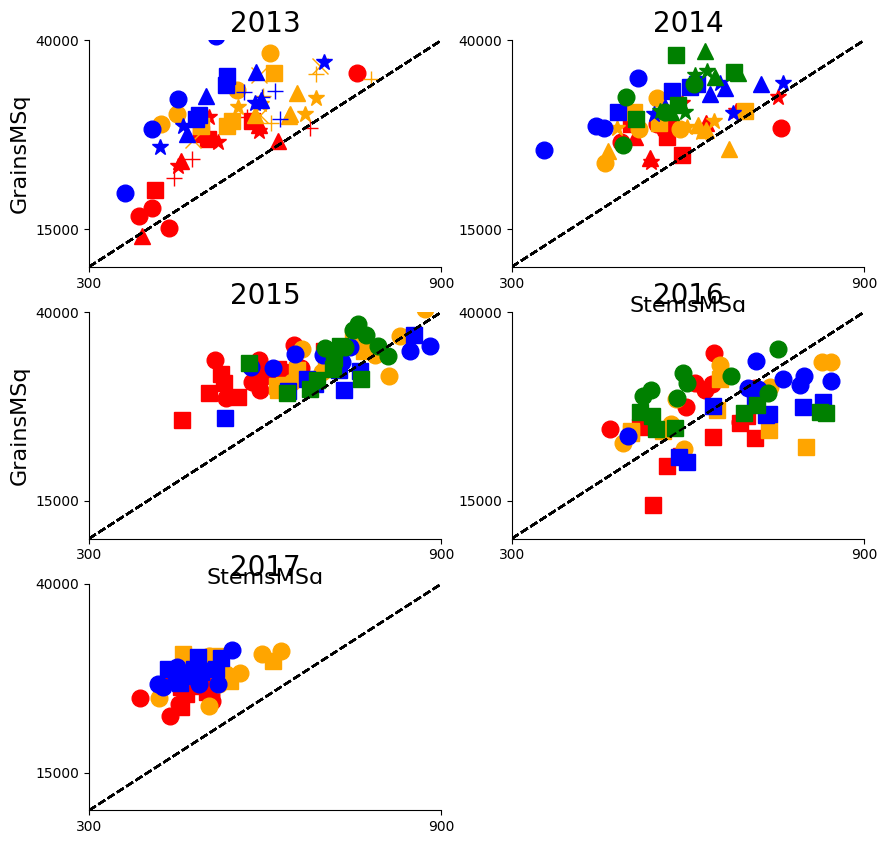

In [65]:
XVar = 'StemsMSq'
YVar = 'GrainsMSq'
MakeSingleVariableRegression(XVar,YVar)

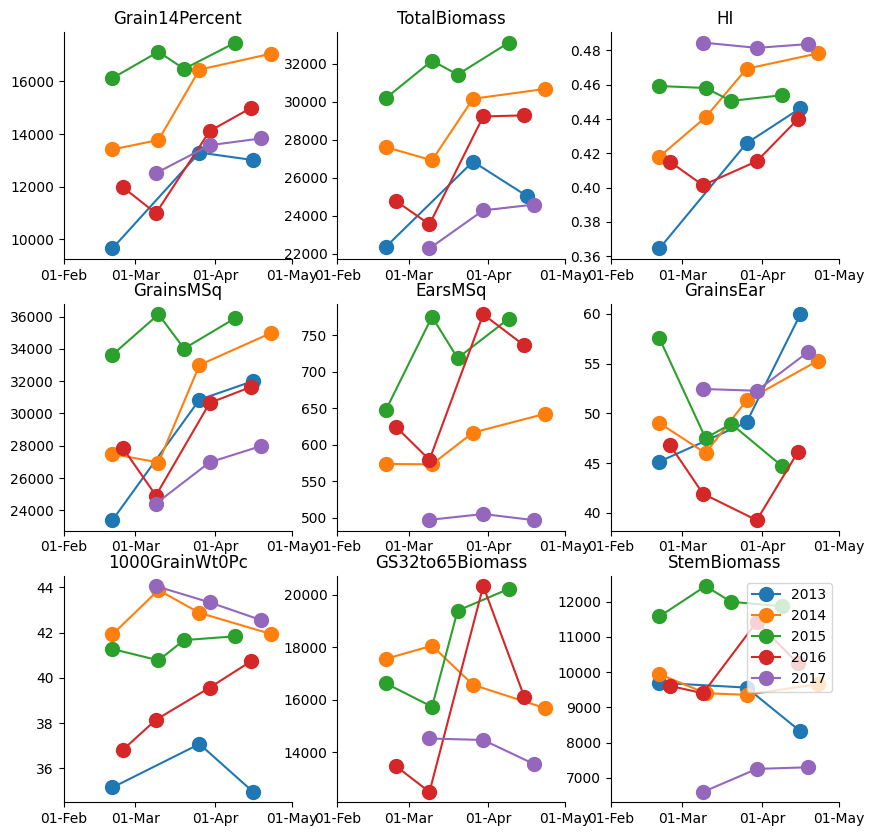

In [66]:
import matplotlib.dates as mdates
Variables = ['Grain14Percent','TotalBiomass','HI',
             'GrainsMSq','EarsMSq','GrainsEar',
             '1000GrainWt0Pc','GS32to65Biomass','StemBiomass']
Filter = (IndexedData.PlantPopn==150)&(IndexedData.Cultivar == 'Wakanui')&(IndexedData.PGRCanopyMgmtTrt=='Normal')&(IndexedData.SampleGS=='GS90')
Graph = plt.figure(figsize=(10,10))
pos = 1
for var in Variables:
    Ax = Graph.add_subplot(3,3,pos)
    Ax.spines['right'].set_visible(False)
    Ax.spines['top'].set_visible(False)
    plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True)
    plt.tick_params(axis='y', which='both', left=True,right=False, labelbottom=True)
    for Year in YearList:
        SowDateMeans = pd.DataFrame(pd.to_numeric(IndexedData.loc[Filter,var][Year]).groupby(level='SowingDate').mean())
        SowDateMeans.loc[:,'SowJDay'] = [dt.datetime(2010,1,1) + (x - dt.datetime(x.year,1,1)) for x in SowDateMeans.index]
        plt.plot(SowDateMeans.SowJDay,SowDateMeans.loc[:,var],'-o',markersize=10,label=Year)
    myFmt = mdates.DateFormatter('%d-%b')
    Ax.xaxis.set_major_formatter(myFmt)
    plt.xlim(dt.date(2010,2,1),dt.date(2010,5,1))
    Ax.xaxis.set_ticks([dt.date(2010,2,1),dt.date(2010,3,1),dt.date(2010,4,1),dt.date(2010,5,1)])
    plt.title(var)
    if pos == 9:
        plt.legend(loc=1,numpoints=1)
    pos+=1

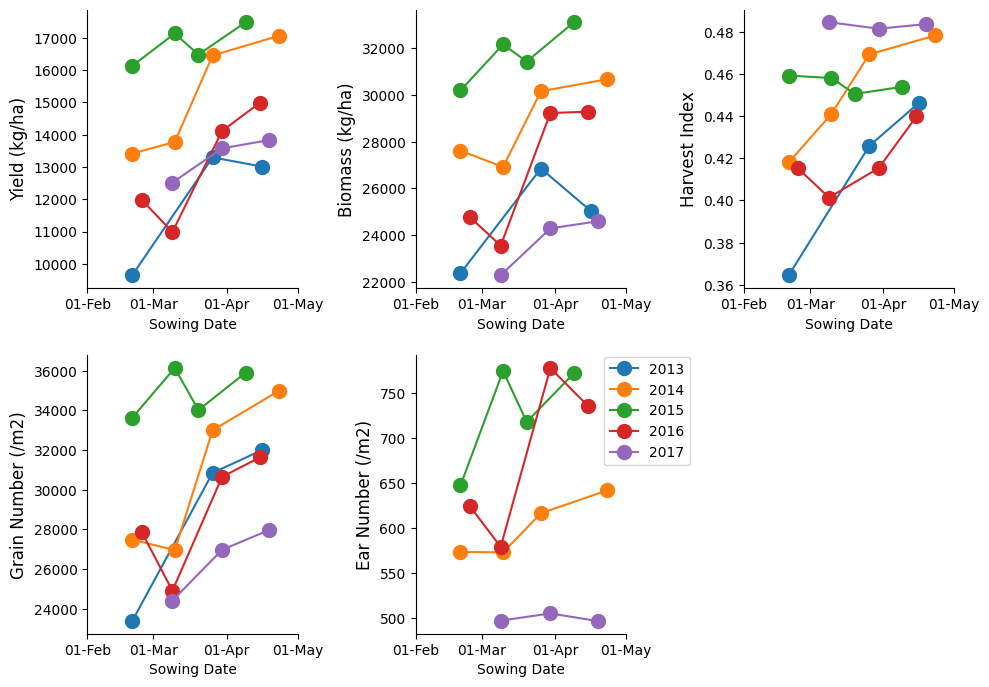

In [67]:
import matplotlib.dates as mdates
Variables = [['Grain14Percent','Yield (kg/ha)'],['TotalBiomass','Biomass (kg/ha)'],['HI','Harvest Index'],
             ['GrainsMSq','Grain Number (/m2)'],['EarsMSq','Ear Number (/m2)']]
Filter = (IndexedData.PlantPopn==150)&(IndexedData.Cultivar == 'Wakanui')&(IndexedData.PGRCanopyMgmtTrt=='Normal')&(IndexedData.SampleGS=='GS90')
Graph = plt.figure(figsize=(10,10))
pos = 1
for var in Variables:
    Ax = Graph.add_subplot(3,3,pos)
    Ax.spines['right'].set_visible(False)
    Ax.spines['top'].set_visible(False)
    plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True)
    plt.tick_params(axis='y', which='both', left=True,right=False, labelbottom=True)
    for Year in YearList:
        SowDateMeans = pd.DataFrame(pd.to_numeric(IndexedData.loc[Filter,var[0]][Year]).groupby(level='SowingDate').mean())
        SowDateMeans.loc[:,'SowJDay'] = [dt.datetime(2010,1,1) + (x - dt.datetime(x.year,1,1)) for x in SowDateMeans.index]
        plt.plot(SowDateMeans.SowJDay,SowDateMeans.loc[:,var[0]],'-o',markersize=10,label=Year)
    myFmt = mdates.DateFormatter('%d-%b')
    Ax.xaxis.set_major_formatter(myFmt)
    plt.xlim(dt.date(2010,2,1),dt.date(2010,5,1))
    Ax.xaxis.set_ticks([dt.date(2010,2,1),dt.date(2010,3,1),dt.date(2010,4,1),dt.date(2010,5,1)])
    plt.ylabel(var[1],fontsize=12)
    plt.xlabel('Sowing Date')
    if pos == 5:
        plt.legend(bbox_to_anchor=(1.1, .8),loc='center',numpoints=1)
    pos+=1
plt.tight_layout()
Graph.savefig('Sowing Date Graphs.jpg')

In [68]:
YearList

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

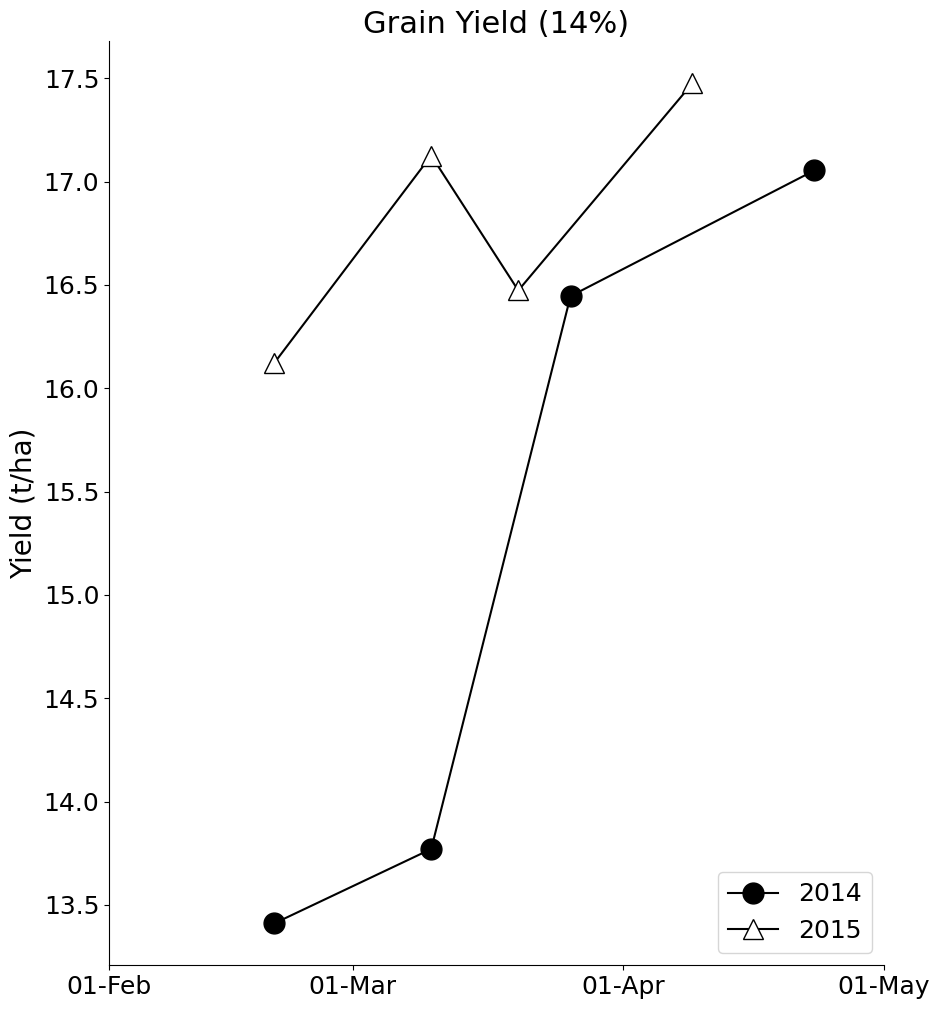

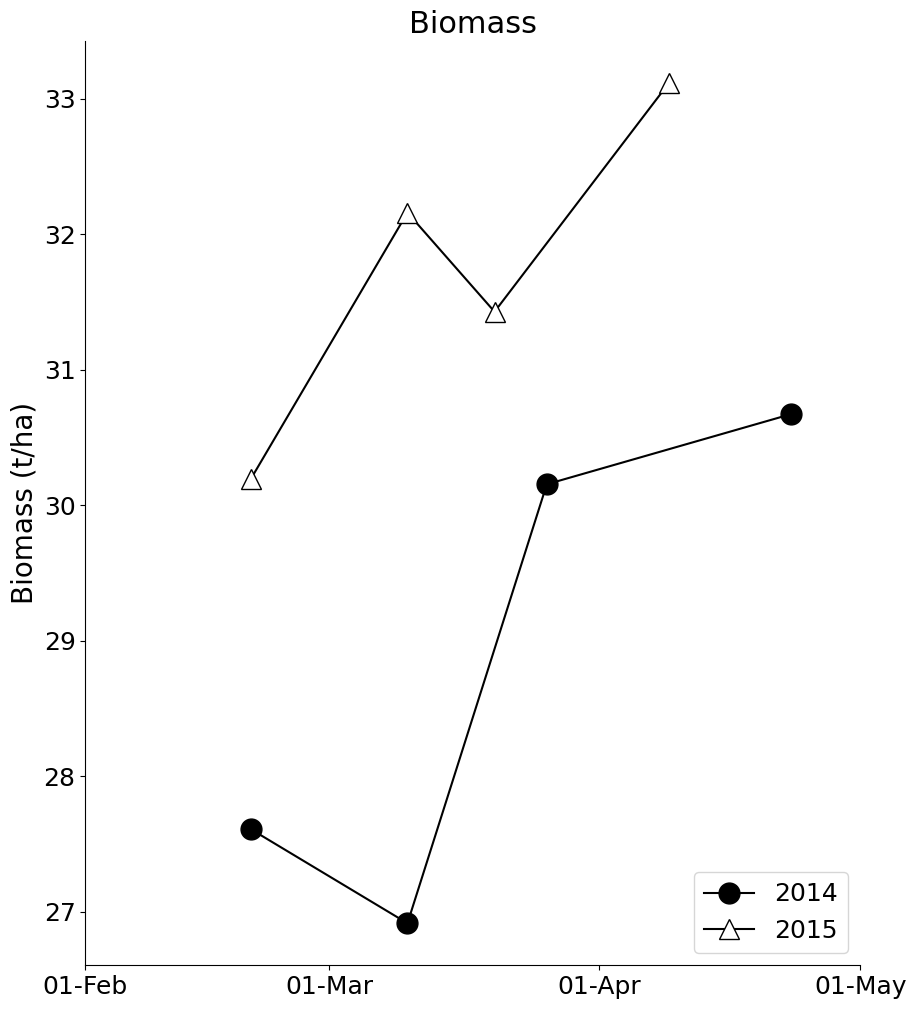

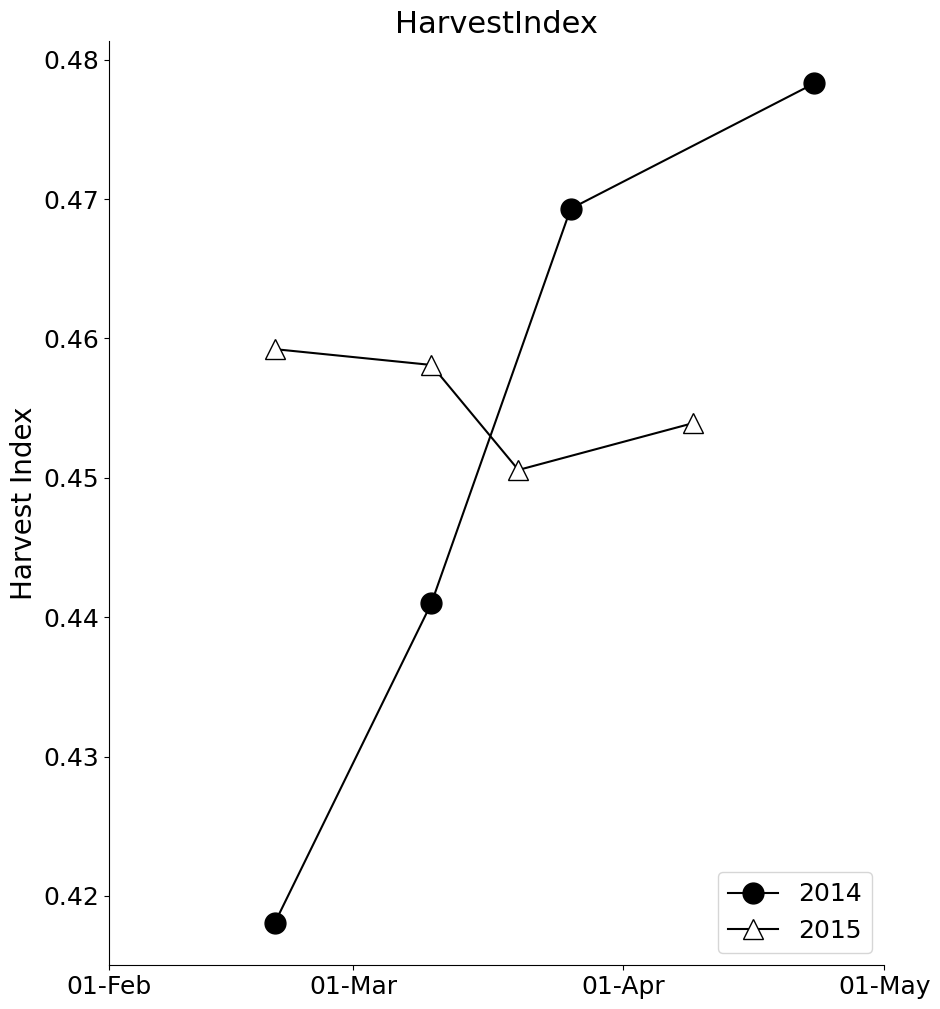

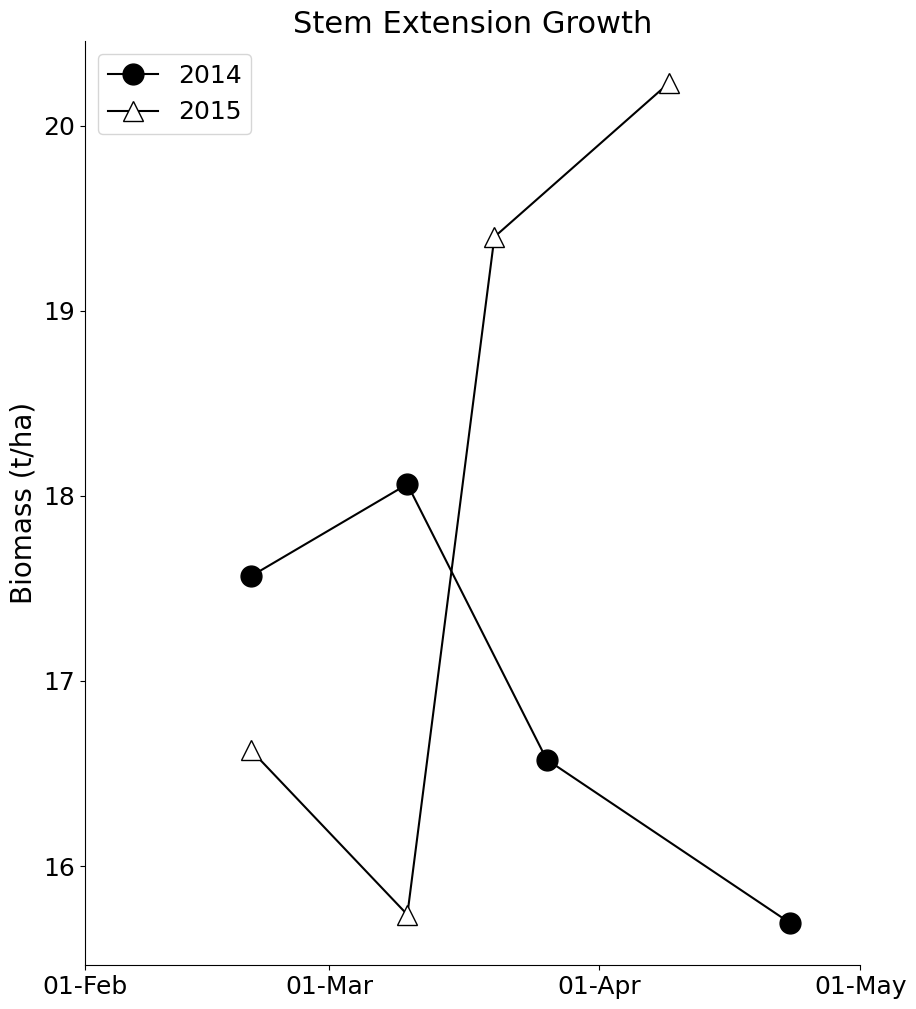

In [69]:
def PoolePlot(var,ylab,title,rescale,legpos=4):

    import matplotlib.dates as mdates
    #var = 'Grain14Percent'#,'TotalBiomass','HI','GS32to65Biomass']
    Filter = (IndexedData.PlantPopn==150)&(IndexedData.Cultivar == 'Wakanui')&(IndexedData.PGRCanopyMgmtTrt=='Normal')&(IndexedData.SampleGS=='GS90')
    Graph = plt.figure(figsize=(10,12))
    pos = 1
    Ax = Graph.add_subplot(1,1,1)
    Ax.spines['right'].set_visible(False)
    Ax.spines['top'].set_visible(False)
    plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True,labelsize=18)
    plt.tick_params(axis='y', which='both', left=True,right=False, labelbottom=True,labelsize=18)
    cols = ['k','w']
    mar = ['o-','^-']
    pos=0
    for Year in [2014, 2015]:
        SowDateMeans = pd.DataFrame(pd.to_numeric(IndexedData.loc[Filter,var][Year]).groupby(level='SowingDate').mean())
        SowDateMeans.loc[:,'SowJDay'] = [dt.datetime(2010,1,1) + (x - dt.datetime(x.year,1,1)) for x in SowDateMeans.index]
        plt.plot(SowDateMeans.SowJDay,SowDateMeans.loc[:,var]/rescale,
                 mar[pos],c='k',mfc=cols[pos],markersize=15,label=Year)
        pos +=1
    myFmt = mdates.DateFormatter('%d-%b')
    Ax.xaxis.set_major_formatter(myFmt)
    plt.xlim(dt.date(2010,2,1),dt.date(2010,5,1))
    Ax.xaxis.set_ticks([dt.date(2010,2,1),dt.date(2010,3,1),dt.date(2010,4,1),dt.date(2010,5,1)])
    plt.title(title,fontsize=22)
    plt.legend(loc=legpos,numpoints=1,fontsize=18)
    plt.ylabel(ylab,fontsize=20)
    Graph.savefig(var+'.jpg',dpi=1000)
    
PoolePlot('Grain14Percent','Yield (t/ha)','Grain Yield (14%)',1000) #var = 'Grain14Percent'#,'TotalBiomass','HI','GS32to65Biomass']
PoolePlot('TotalBiomass','Biomass (t/ha)','Biomass',1000) 
PoolePlot('HI','Harvest Index','HarvestIndex',1) 
PoolePlot('GS32to65Biomass','Biomass (t/ha)','Stem Extension Growth',1000,legpos=2) 

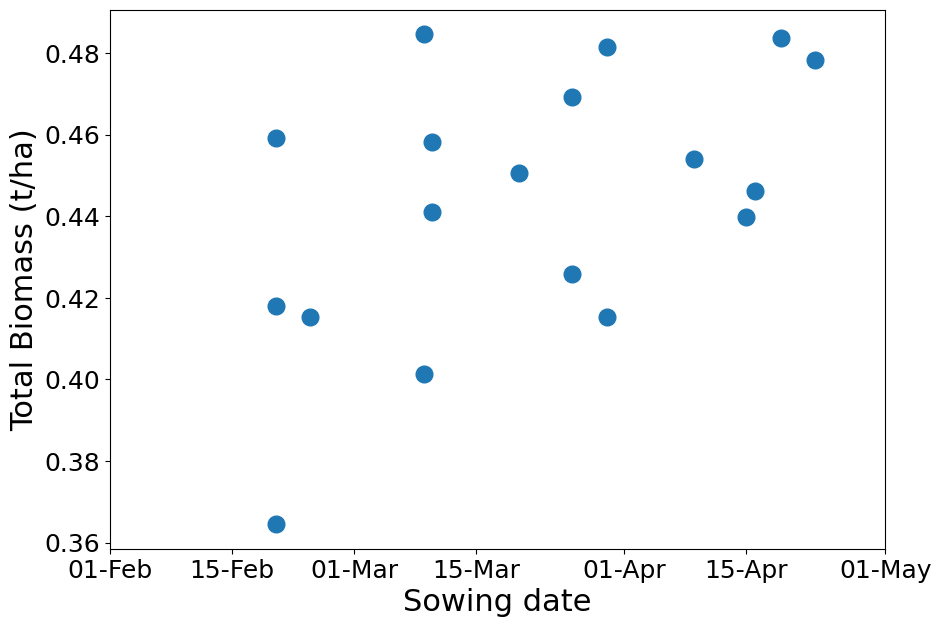

In [70]:
Graph = plt.figure(figsize=(10,7))
import matplotlib.dates as mdates

Filter = (IndexedData.PlantPopn==150)&(IndexedData.Cultivar == 'Wakanui')&(IndexedData.PGRCanopyMgmtTrt=='Normal')&(IndexedData.SampleGS=='GS90')
SowDateMeans = pd.DataFrame(pd.to_numeric(IndexedData.loc[Filter,'HI']).groupby(level='SowingDate').mean())
SowDateMeans.loc[:,'SowJDay'] = [dt.datetime(2010,1,1) + (x - dt.datetime(x.year,1,1)) for x in SowDateMeans.index]
#SowDateMeans.index.strftime('%d-%b')
ax = Graph.add_subplot(1,1,1)
plt.plot(SowDateMeans.SowJDay,SowDateMeans.HI,'o',markersize=12)
myFmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_formatter(myFmt)
plt.xlim(dt.date(2010,2,1),dt.date(2010,5,1))
Ax.xaxis.set_ticks([dt.date(2010,2,1),dt.date(2010,3,1),dt.date(2010,4,1),dt.date(2010,5,1)])
plt.ylabel('Total Biomass (t/ha)',fontsize=22)
plt.xlabel('Sowing date',fontsize=22)
plt.tick_params(labelsize=18)
#ax.yaxis.set_ticklabels([22,24,26,28,30,32,34])

## Extract a subset of mean data and export

In [71]:
pd.set_option("display.max_columns",101)

In [72]:
FloweringFilter = IndexedData.loc[:,'ApproxGS']=='Flowering'

In [73]:
#List variables to export
Vars = ['Location',
        'SampleDate',
        'TrialCode',
        'TrtNum',
        'NumLigules',
        'I/Io',
        'ReassessmentGS',
        'TotalBiomass',
        'Grain0Percent',
        'StemBiomass',
        'EarBiomass',
        'ChaffBiomass',
        'TotalLeafBiomass',
        'GreenLeafBiomass',
        'DeadLeafBiomass',
        'GrainsMSq',
        'StemsMSq',
        '1000GrainWt0Pc']

#Extrat these into a data frame and set sample date into the index
BaseData = IndexedData.loc[:,Vars].set_index(['SampleDate','TrialCode','TrtNum','Location'],append=True)

#Get rid of non-numeric values
for Col in BaseData.columns:
    BaseData.loc[:,Col] = pd.to_numeric(BaseData.loc[:,Col])

#Group data to give means
ExportData = BaseData.groupby(level=['Location',
                                     'TrtNum',
                                     'YearSown',
                                       'SowingDate',
                                       'Cultivar',
                                       'PlantPopn',
                                       'PGRCanopyMgmtTrt',
                                       'SampleDate']).mean().dropna(how='all')


In [74]:
def setTreatment(x):
    Year = ExportData.index.get_level_values(2)[x]
    if Year in [2013,2014]:
        treat = 'Popn' + str(ExportData.index.get_level_values(5)[x])
    else:
        treat = 'Cm' + str(ExportData.index.get_level_values(6)[x])
    return treat
    

In [75]:
ExportData.loc[:,'Experiment'] = [ExportData.index.get_level_values(0)[x]+str(ExportData.index.get_level_values(2)[x]) for x in range(ExportData.index.size)]
ExportData.loc[:,'ExpSD'] = [ExportData.iloc[x,:].loc['Experiment'] +'Sow'+ ExportData.index.get_level_values(3)[x].strftime('%d-%b') for x in range(ExportData.index.size)]
ExportData.loc[:,'SimulationName'] = [ExportData.iloc[x,:].loc['ExpSD'] + setTreatment(x) for x in range(ExportData.index.size)]
ExportData.set_index('SimulationName',drop=False,append=True,inplace=True)
ExportData.index = ExportData.index.droplevel(level=[0,1,2,3,4,5,6])
ExportData.index = ExportData.index.swaplevel('SimulationName','SampleDate')
ExportData = ExportData.loc[:,ExportData.columns.drop(['Experiment','ExpSD','SimulationName'])]
ExportData.index.names=['SimulationName','Clock.Today']

In [76]:
APSIMLabels = ['Wheat.Leaf.ExpandedCohortNo',
 'Wheat.Leaf.CoverGreen','Wheat.Phenology.Zadok.Stage','Wheat.AboveGround.Wt',
 'Wheat.Grain.Wt','Wheat.Stem.Wt','Wheat.Ear.Wt','Wheat.Spike.Wt',
 'Wheat.Leaf.Wt','Wheat.Leaf.Live.Wt','Wheat.Leaf.Dead.Wt',
 'Wheat.Grain.Number','Wheat.Structure.TotalStemPopn','Wheat.Grain.Size']

In [77]:
ExportData.columns = APSIMLabels

In [78]:
def HarvestMarker(x):
    if np.isnan(ExportData.iloc[x,:]['Wheat.Grain.Wt']):
        return ''
    else:
        return 'HarvestRipe'

In [79]:
ExportData.loc[:,'Wheat.Phenology.CurrentStageName'] = [HarvestMarker(x) for x in range(ExportData.index.size)]

In [80]:
#Copy colum headers in from excel master observed file
ObsIndex = [u'Wheat.SowingData.Cultivar', u'ET', u'ProfileWater',
       u'Soil.SoilWater.SW(1)', u'Soil.SoilWater.SW(2)',
       u'Soil.SoilWater.SW(3)', u'Soil.SoilWater.SW(4)',
       u'Soil.SoilWater.SW(5)', u'Soil.SoilWater.SW(6)',
       u'Soil.SoilWater.SW(7)', u'Soil.SoilWater.SW(8)',
       u'Soil.SoilWater.SW(9)', u'Soil.SoilWater.SW(10)', u'TillerNo',
       u'Wheat.AboveGround.N', u'Wheat.AboveGround.Wt', u'Wheat.Ear.Wt',
       u'Wheat.Ear.Nconc', u'Wheat.Ear.N', u'Wheat.Grain.NConc',
       u'Wheat.Grain.Size', u'Wheat.Grain.N', u'Wheat.Grain.Number',
       u'Wheat.Grain.Protein', u'Wheat.Grain.Wt',
       u'Wheat.Structure.LeafTipsAppeared', u'Wheat.Leaf.CoverTotal',
       u'Wheat.Leaf.CoverGreen', u'Wheat.Leaf.Dead.NConc',
       u'Wheat.Leaf.Dead.N', u'Wheat.Leaf.Dead.Wt', u'Wheat.Leaf.DeadCohortNo',
       u'Wheat.Leaf.ExpandedCohortNo', u'Wheat.Leaf.LAI',
       u'Wheat.Leaf.Live.NConc', u'Wheat.Leaf.Live.N', u'Wheat.Leaf.Live.Wt',
       u'Wheat.Leaf.NonStructural.Wt', u'Wheat.Leaf.Wt',
       u'Wheat.Leaf.SpecificArea', u'Wheat.Phenology.CurrentStageName',
       u'Wheat.Phenology.FlagLeafDAS.Value()',
       u'Wheat.Phenology.FloweringDAS.Value()',
       u'Wheat.Phenology.ReadyForHarvestDAS.Value()',
       u'Wheat.Phenology.Zadok.Stage', u'Wheat.Population', u'Wheat.Spike.N',
       u'Wheat.Spike.NonStructural.Wt', u'Wheat.Spike.Wt',
       u'Wheat.Spike.NConc', u'Wheat.Stem.NConc', u'Wheat.Stem.N',
       u'Wheat.Stem.NonStructural.Wt', u'Wheat.Stem.Wt',
       u'Wheat.Structure.TotalStemPopn', u'Wheat.Structure.HaunStage.Value()',
       u'Wheat.Leaf.CohortMaxSize(1)', u'Wheat.Leaf.CohortMaxSize(2)',
       u'Wheat.Leaf.CohortMaxSize(3)', u'Wheat.Leaf.CohortMaxSize(4)',
       u'Wheat.Leaf.CohortMaxSize(5)', u'Wheat.Leaf.CohortMaxSize(6)',
       u'Wheat.Leaf.CohortMaxSize(7)', u'Wheat.Leaf.CohortMaxSize(8)',
       u'Wheat.Leaf.CohortMaxSize(9)', u'Wheat.Leaf.CohortMaxSize(10)',
       u'Wheat.Leaf.CohortMaxSize(11)', u'Wheat.Leaf.CohortMaxSize(12)',
       u'Wheat.Leaf.CohortMaxSize(13)', u'Wheat.Leaf.CohortMaxSize(14)',
       u'Wheat.Leaf.CohortMaxSize(15)', u'Wheat.Leaf.CohortMaxSize(16)',
       u'Wheat.Leaf.CohortMaxSize(17)', u'Wheat.Leaf.CohortMaxSize(18)',
       u'TopSoilWater']

In [81]:
ExportData = ExportData.loc[:,ObsIndex]

KeyError: "['Wheat.SowingData.Cultivar', 'ET', 'ProfileWater', 'Soil.SoilWater.SW(1)', 'Soil.SoilWater.SW(2)', 'Soil.SoilWater.SW(3)', 'Soil.SoilWater.SW(4)', 'Soil.SoilWater.SW(5)', 'Soil.SoilWater.SW(6)', 'Soil.SoilWater.SW(7)', 'Soil.SoilWater.SW(8)', 'Soil.SoilWater.SW(9)', 'Soil.SoilWater.SW(10)', 'TillerNo', 'Wheat.AboveGround.N', 'Wheat.Ear.Nconc', 'Wheat.Ear.N', 'Wheat.Grain.NConc', 'Wheat.Grain.N', 'Wheat.Grain.Protein', 'Wheat.Structure.LeafTipsAppeared', 'Wheat.Leaf.CoverTotal', 'Wheat.Leaf.Dead.NConc', 'Wheat.Leaf.Dead.N', 'Wheat.Leaf.DeadCohortNo', 'Wheat.Leaf.LAI', 'Wheat.Leaf.Live.NConc', 'Wheat.Leaf.Live.N', 'Wheat.Leaf.NonStructural.Wt', 'Wheat.Leaf.SpecificArea', 'Wheat.Phenology.FlagLeafDAS.Value()', 'Wheat.Phenology.FloweringDAS.Value()', 'Wheat.Phenology.ReadyForHarvestDAS.Value()', 'Wheat.Population', 'Wheat.Spike.N', 'Wheat.Spike.NonStructural.Wt', 'Wheat.Spike.NConc', 'Wheat.Stem.NConc', 'Wheat.Stem.N', 'Wheat.Stem.NonStructural.Wt', 'Wheat.Structure.HaunStage.Value()', 'Wheat.Leaf.CohortMaxSize(1)', 'Wheat.Leaf.CohortMaxSize(2)', 'Wheat.Leaf.CohortMaxSize(3)', 'Wheat.Leaf.CohortMaxSize(4)', 'Wheat.Leaf.CohortMaxSize(5)', 'Wheat.Leaf.CohortMaxSize(6)', 'Wheat.Leaf.CohortMaxSize(7)', 'Wheat.Leaf.CohortMaxSize(8)', 'Wheat.Leaf.CohortMaxSize(9)', 'Wheat.Leaf.CohortMaxSize(10)', 'Wheat.Leaf.CohortMaxSize(11)', 'Wheat.Leaf.CohortMaxSize(12)', 'Wheat.Leaf.CohortMaxSize(13)', 'Wheat.Leaf.CohortMaxSize(14)', 'Wheat.Leaf.CohortMaxSize(15)', 'Wheat.Leaf.CohortMaxSize(16)', 'Wheat.Leaf.CohortMaxSize(17)', 'Wheat.Leaf.CohortMaxSize(18)', 'TopSoilWater'] not in index"

In [ ]:
# Remember to change the destination file!!!
ExportData.to_excel('K:\CPDiary\Data\FAR 20by2020\BiomassData.xlsx',sheet_name='BiomassData',merge_cells=False)